In [269]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import periodogram


In [295]:
df = pd.read_csv('../datasets/adausdt_5m_13_07_24_22_28.csv')
df.head()

id event_type     event_time   symbol  kline_start_time  kline_close_time  \
0   1      kline  1720902529196  ADAUSDT     1720902300000     1720902599999   
1   2      kline  1720902534612  ADAUSDT     1720902300000     1720902599999   
2   3      kline  1720902536804  ADAUSDT     1720902300000     1720902599999   
3   4      kline  1720902542444  ADAUSDT     1720902300000     1720902599999   
4   5      kline  1720902544805  ADAUSDT     1720902300000     1720902599999   

  interval  first_trade_id  last_trade_id  open_price  close_price  \
0       5m       495483339      495483527      0.4414       0.4412   
1       5m       495483339      495483528      0.4414       0.4412   
2       5m       495483339      495483530      0.4414       0.4412   
3       5m       495483339      495483533      0.4414       0.4413   
4       5m       495483339      495483543      0.4414       0.4414   

   high_price  low_price    volume  number_of_trades  is_kline_closed  \
0      0.4417     0.4409  137977.5               189            False   
1      0.4417     0.4409  138130.9               190            False   
2      0.4417     0.4409  138369.6               192            False   
3      0.4417     0.4409  140130.8               195            False   
4      0.4417     0.4409  142611.4               205            False   

   quote_assest_volume  take_buy_base_asset_volume  \
0          60877.64320                     51428.2   
1          60945.32328                     51581.6   
2          61050.63772                     51820.3   
3          61827.85528                     53581.5   
4          62922.88819                     55976.1   

   taker_buy_quote_asset_volume  ignore  
0                   22690.41678       0  
1                   22758.09686       0  
2                   22863.41130       0  
3                   23640.62886       0  
4                   24697.70137       0

In [296]:
columns_to_drop =[
    'event_type',
    'symbol',
    'interval',
    'first_trade_id',
    'last_trade_id',
    'ignore',
    'quote_assest_volume',
    'take_buy_base_asset_volume',
    'taker_buy_quote_asset_volume'
]
df = df.drop(columns_to_drop, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79610 entries, 0 to 79609
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                79610 non-null  int64  
 1   event_time        79610 non-null  int64  
 2   kline_start_time  79610 non-null  int64  
 3   kline_close_time  79610 non-null  int64  
 4   open_price        79610 non-null  float64
 5   close_price       79610 non-null  float64
 6   high_price        79610 non-null  float64
 7   low_price         79610 non-null  float64
 8   volume            79610 non-null  float64
 9   number_of_trades  79610 non-null  int64  
 10  is_kline_closed   79610 non-null  bool   
dtypes: bool(1), float64(5), int64(5)
memory usage: 6.1 MB


In [297]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms')
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms')
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [298]:
df.set_index('event_time', inplace=True)
df.head()

id    kline_start_time        kline_close_time  \
event_time                                                                
2024-07-13 20:28:49.196   1 2024-07-13 20:25:00 2024-07-13 20:29:59.999   
2024-07-13 20:28:54.612   2 2024-07-13 20:25:00 2024-07-13 20:29:59.999   
2024-07-13 20:28:56.804   3 2024-07-13 20:25:00 2024-07-13 20:29:59.999   
2024-07-13 20:29:02.444   4 2024-07-13 20:25:00 2024-07-13 20:29:59.999   
2024-07-13 20:29:04.805   5 2024-07-13 20:25:00 2024-07-13 20:29:59.999   

                         open_price  close_price  high_price  low_price  \
event_time                                                                
2024-07-13 20:28:49.196      0.4414       0.4412      0.4417     0.4409   
2024-07-13 20:28:54.612      0.4414       0.4412      0.4417     0.4409   
2024-07-13 20:28:56.804      0.4414       0.4412      0.4417     0.4409   
2024-07-13 20:29:02.444      0.4414       0.4413      0.4417     0.4409   
2024-07-13 20:29:04.805      0.4414       0.4414      0.4417     0.4409   

                           volume  number_of_trades  is_kline_closed  
event_time                                                            
2024-07-13 20:28:49.196  137977.5               189            False  
2024-07-13 20:28:54.612  138130.9               190            False  
2024-07-13 20:28:56.804  138369.6               192            False  
2024-07-13 20:29:02.444  140130.8               195            False  
2024-07-13 20:29:04.805  142611.4               205            False

In [299]:
df['event_time_day'] = df.index.day

In [300]:
df = df[df['event_time_day']<= 14]

In [277]:
df = df[(df['id'] > 18) & (df['id'] <= 3470)]
df = df.sort_values(by='id')
df

id    kline_start_time        kline_close_time  \
event_time                                                                  
2024-07-13 20:30:00.008    19 2024-07-13 20:25:00 2024-07-13 20:29:59.999   
2024-07-13 20:30:02.122    20 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
2024-07-13 20:30:04.126    21 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
2024-07-13 20:30:06.566    22 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
2024-07-13 20:30:10.741    23 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
...                       ...                 ...                     ...   
2024-07-13 23:54:47.330  3466 2024-07-13 23:50:00 2024-07-13 23:54:59.999   
2024-07-13 23:54:50.026  3467 2024-07-13 23:50:00 2024-07-13 23:54:59.999   
2024-07-13 23:54:53.595  3468 2024-07-13 23:50:00 2024-07-13 23:54:59.999   
2024-07-13 23:54:59.268  3469 2024-07-13 23:50:00 2024-07-13 23:54:59.999   
2024-07-13 23:55:00.005  3470 2024-07-13 23:50:00 2024-07-13 23:54:59.999   

                         open_price  close_price  high_price  low_price  \
event_time                                                                
2024-07-13 20:30:00.008      0.4414       0.4413      0.4417     0.4409   
2024-07-13 20:30:02.122      0.4412       0.4412      0.4412     0.4412   
2024-07-13 20:30:04.126      0.4412       0.4413      0.4413     0.4412   
2024-07-13 20:30:06.566      0.4412       0.4412      0.4413     0.4412   
2024-07-13 20:30:10.741      0.4412       0.4414      0.4414     0.4412   
...                             ...          ...         ...        ...   
2024-07-13 23:54:47.330      0.4414       0.4410      0.4414     0.4403   
2024-07-13 23:54:50.026      0.4414       0.4410      0.4414     0.4403   
2024-07-13 23:54:53.595      0.4414       0.4410      0.4414     0.4403   
2024-07-13 23:54:59.268      0.4414       0.4410      0.4414     0.4403   
2024-07-13 23:55:00.005      0.4414       0.4410      0.4414     0.4403   

                           volume  number_of_trades  is_kline_closed  \
event_time                                                             
2024-07-13 20:30:00.008  221262.8               456             True   
2024-07-13 20:30:02.122     599.9                 3            False   
2024-07-13 20:30:04.126    1051.2                 8            False   
2024-07-13 20:30:06.566    1621.3                13            False   
2024-07-13 20:30:10.741   45849.4                39            False   
...                           ...               ...              ...   
2024-07-13 23:54:47.330  250178.3               344            False   
2024-07-13 23:54:50.026  250189.9               345            False   
2024-07-13 23:54:53.595  250252.9               350            False   
2024-07-13 23:54:59.268  250559.8               353            False   
2024-07-13 23:55:00.005  252702.7               355             True   

                         event_time_day  
event_time                               
2024-07-13 20:30:00.008              13  
2024-07-13 20:30:02.122              13  
2024-07-13 20:30:04.126              13  
2024-07-13 20:30:06.566              13  
2024-07-13 20:30:10.741              13  
...                                 ...  
2024-07-13 23:54:47.330              13  
2024-07-13 23:54:50.026              13  
2024-07-13 23:54:53.595              13  
2024-07-13 23:54:59.268              13  
2024-07-13 23:55:00.005              13  

[3452 rows x 11 columns]

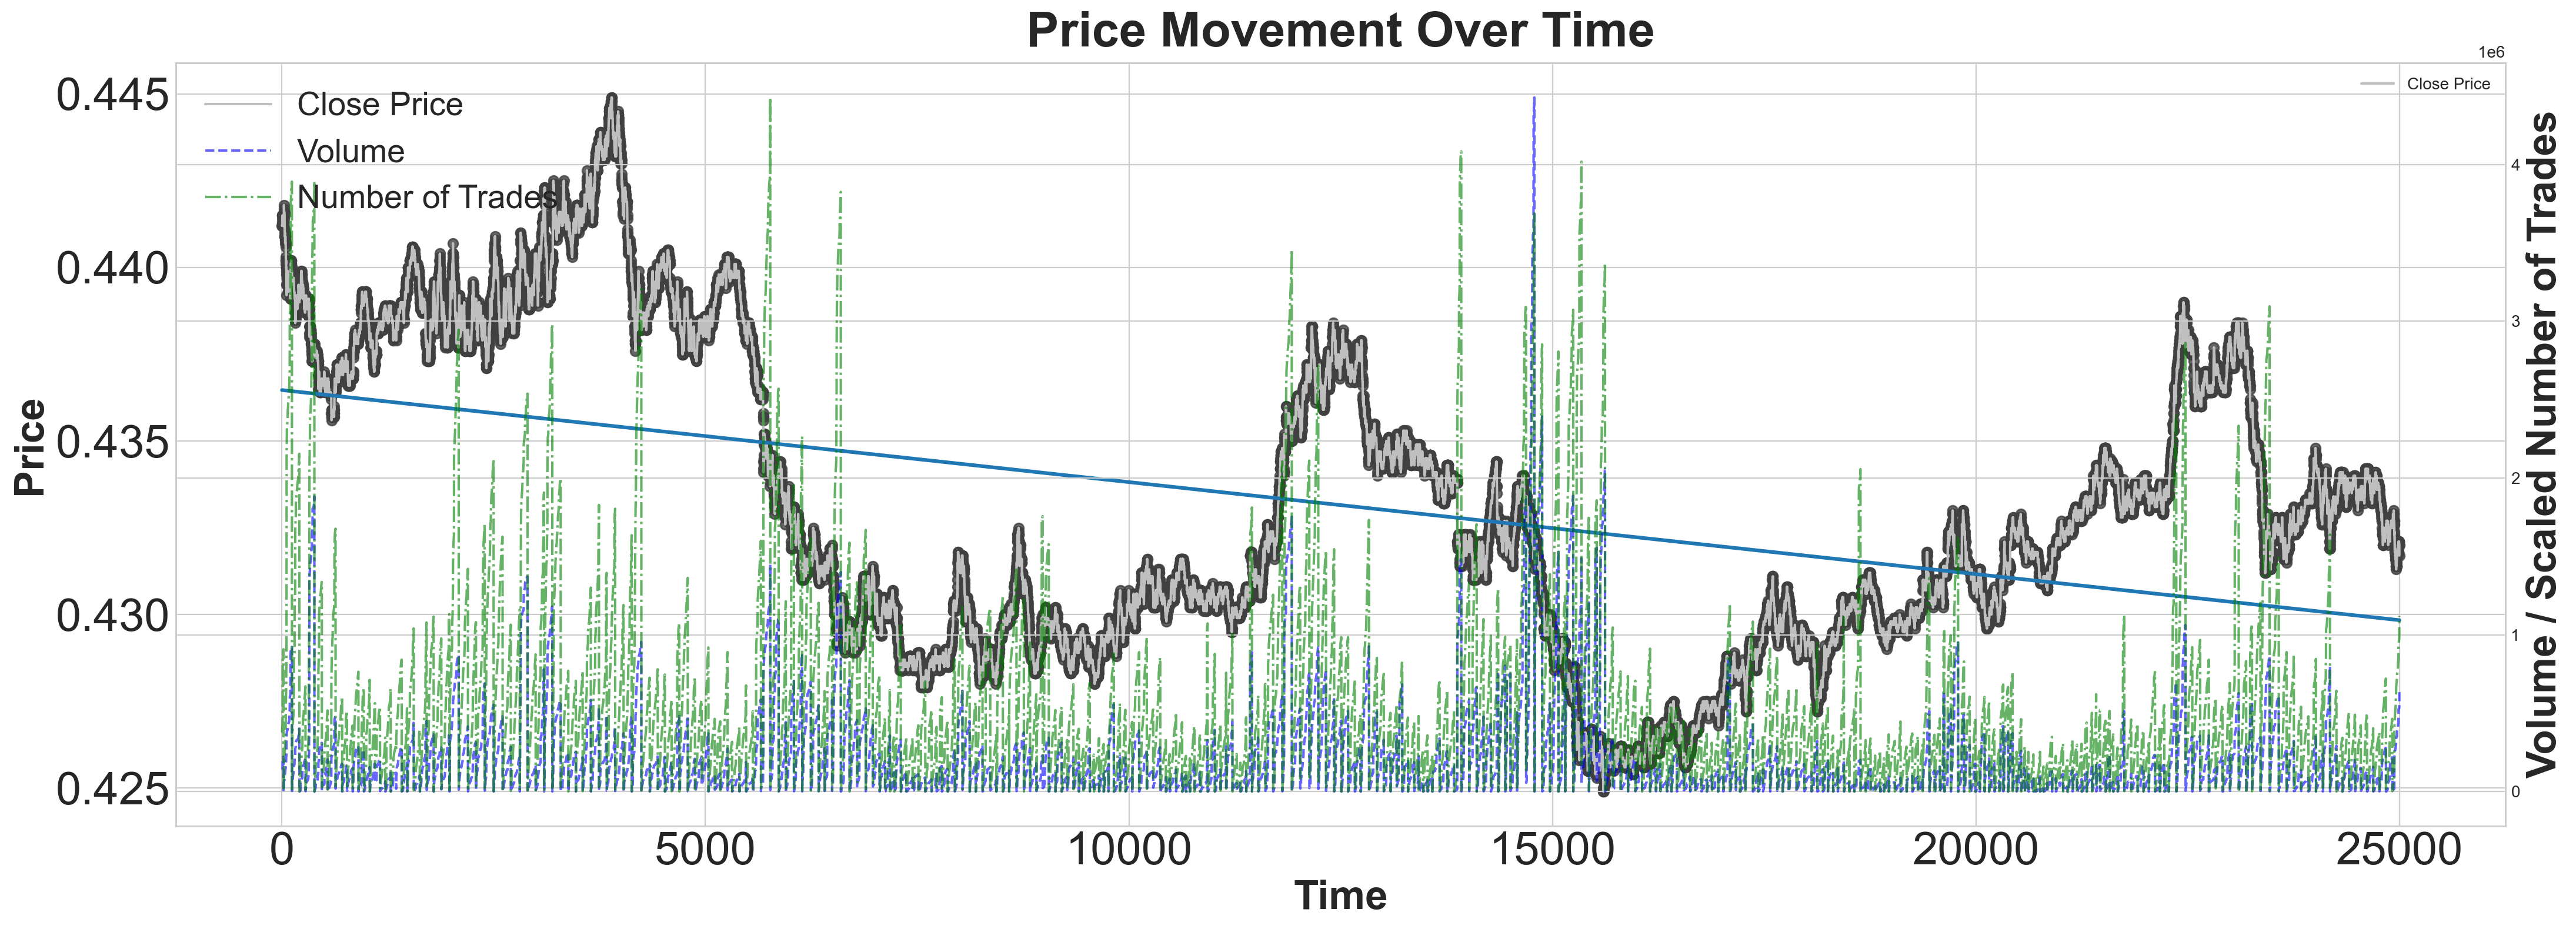

In [301]:
df['scaled_trades'] = (df['number_of_trades'] - df['number_of_trades'].min()) / (df['number_of_trades'].max() - df['number_of_trades'].min()) * df['volume'].max()

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(22, 8),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax1 = plt.subplots(figsize=(22, 8))

sns.lineplot(x='id', y='close_price', data=df, ax=ax1, color='0.75', label='Close Price')
sns.regplot(x='id', y='close_price', data=df, ax=ax1, ci=None, scatter_kws=dict(color='0.25'))


ax1.set_title('Price Movement Over Time', fontsize=30)
ax1.set_xlabel('Time', fontsize=25)
ax1.set_ylabel('Price', fontsize=25)


ax1.tick_params(axis='both', labelsize=28)


ax2 = ax1.twinx()

sns.lineplot(x='id', y='volume', data=df, ax=ax2, color='b', linestyle='--', label='Volume', alpha=0.6)

sns.lineplot(x='id', y='scaled_trades', data=df, ax=ax2, color='g', linestyle='-.', label='Number of Trades', alpha=0.6)


ax2.set_ylabel('Volume / Scaled Number of Trades', fontsize=25)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=20)

plt.show()

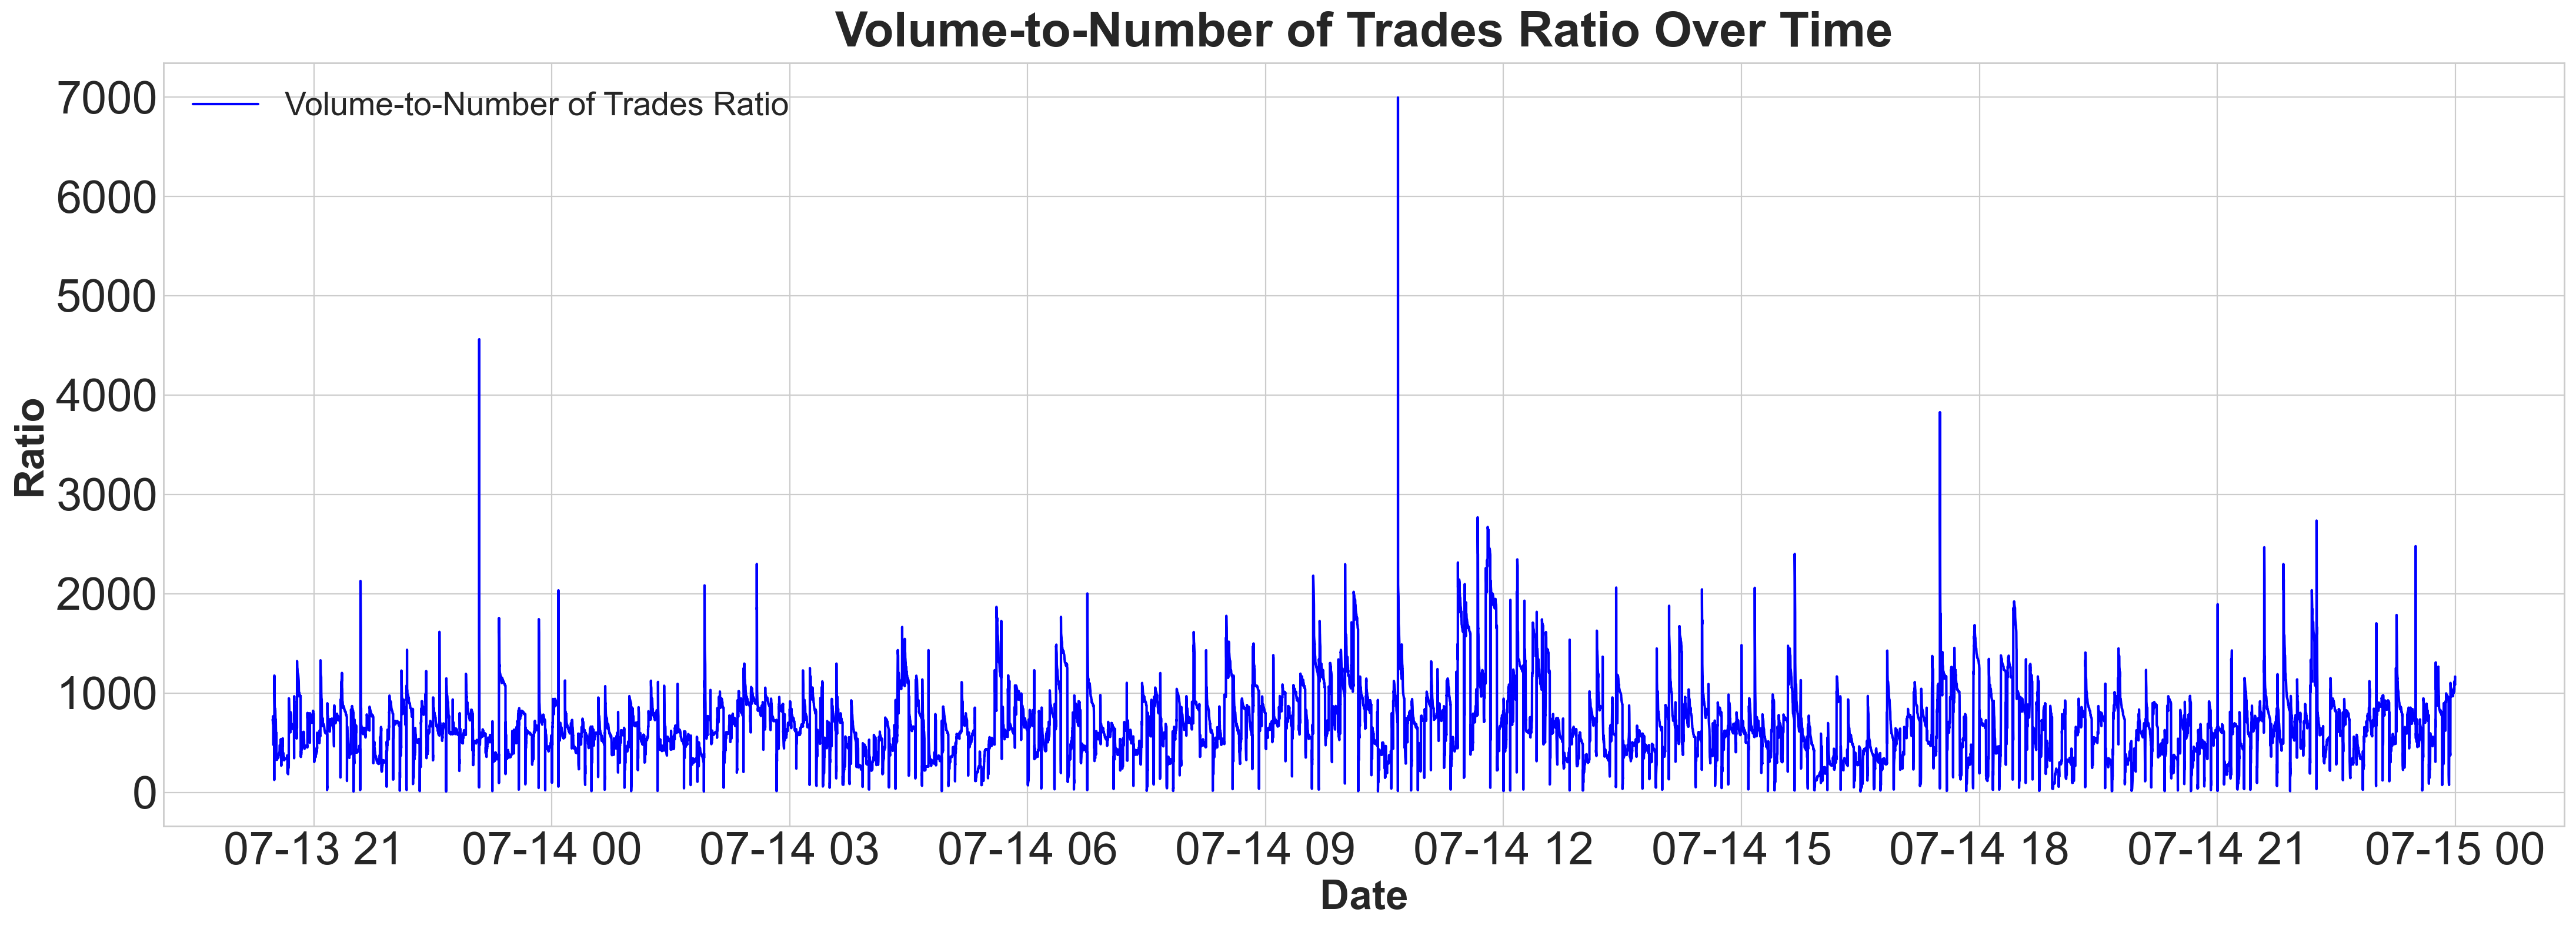

In [302]:
df['volume_to_trades'] = df['volume'] / df['number_of_trades']


plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(22, 8),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(22, 8))


sns.lineplot(x=df.index, y=df['volume_to_trades'], ax=ax, color='b', label='Volume-to-Number of Trades Ratio')


ax.set_title('Volume-to-Number of Trades Ratio Over Time', fontsize=30)
ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Ratio', fontsize=25)

ax.tick_params(axis='both', labelsize=28)

ax.legend(loc='upper left', fontsize=20)

plt.show()

In [240]:
df[df['is_kline_closed'] == True]

id    kline_start_time        kline_close_time  \
event_time                                                                 
2024-07-13 20:30:00.008   19 2024-07-13 20:25:00 2024-07-13 20:29:59.999   
2024-07-13 20:35:00.005  118 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
2024-07-13 20:40:00.005  206 2024-07-13 20:35:00 2024-07-13 20:39:59.999   
2024-07-13 20:45:00.006  278 2024-07-13 20:40:00 2024-07-13 20:44:59.999   
2024-07-13 20:50:00.005  383 2024-07-13 20:45:00 2024-07-13 20:49:59.999   
2024-07-13 20:55:00.006  471 2024-07-13 20:50:00 2024-07-13 20:54:59.999   
2024-07-13 21:00:00.008  539 2024-07-13 20:55:00 2024-07-13 20:59:59.999   
2024-07-13 21:05:00.006  633 2024-07-13 21:00:00 2024-07-13 21:04:59.999   
2024-07-13 21:10:00.006  711 2024-07-13 21:05:00 2024-07-13 21:09:59.999   
2024-07-13 21:15:00.008  768 2024-07-13 21:10:00 2024-07-13 21:14:59.999   
2024-07-13 21:20:00.005  834 2024-07-13 21:15:00 2024-07-13 21:19:59.999   
2024-07-13 21:25:00.005  903 2024-07-13 21:20:00 2024-07-13 21:24:59.999   
2024-07-13 21:30:00.007  967 2024-07-13 21:25:00 2024-07-13 21:29:59.999   

                         open_price  close_price  high_price  low_price  \
event_time                                                                
2024-07-13 20:30:00.008      0.4414       0.4413      0.4417     0.4409   
2024-07-13 20:35:00.005      0.4412       0.4399      0.4418     0.4390   
2024-07-13 20:40:00.005      0.4398       0.4390      0.4398     0.4383   
2024-07-13 20:45:00.006      0.4391       0.4389      0.4399     0.4387   
2024-07-13 20:50:00.005      0.4389       0.4377      0.4392     0.4373   
2024-07-13 20:55:00.006      0.4377       0.4368      0.4378     0.4364   
2024-07-13 21:00:00.008      0.4368       0.4365      0.4370     0.4364   
2024-07-13 21:05:00.006      0.4365       0.4364      0.4368     0.4356   
2024-07-13 21:10:00.006      0.4363       0.4374      0.4374     0.4363   
2024-07-13 21:15:00.008      0.4374       0.4371      0.4375     0.4368   
2024-07-13 21:20:00.005      0.4371       0.4369      0.4373     0.4366   
2024-07-13 21:25:00.005      0.4368       0.4380      0.4382     0.4368   
2024-07-13 21:30:00.007      0.4380       0.4390      0.4393     0.4380   

                            volume  number_of_trades  is_kline_closed  
event_time                                                             
2024-07-13 20:30:00.008   221262.8               456             True  
2024-07-13 20:35:00.005   922004.1              1956             True  
2024-07-13 20:40:00.005   401107.3              1083             True  
2024-07-13 20:45:00.006   214924.2               337             True  
2024-07-13 20:50:00.005  1882983.5              1958             True  
2024-07-13 20:55:00.006   310093.8               672             True  
2024-07-13 21:00:00.008   205108.4               260             True  
2024-07-13 21:05:00.006   475999.0               843             True  
2024-07-13 21:10:00.006   176930.6               304             True  
2024-07-13 21:15:00.008   166331.0               259             True  
2024-07-13 21:20:00.005   146622.9               211             True  
2024-07-13 21:25:00.005   289495.5               384             True  
2024-07-13 21:30:00.007   266340.8               332             True

In [241]:
type(df[df['is_kline_closed'] == True]['id'][0])

C:\Users\HP\AppData\Local\Temp\ipykernel_16472\2001933684.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



numpy.int64

In [242]:
df[df['is_kline_closed'] == True]['id'][1]

C:\Users\HP\AppData\Local\Temp\ipykernel_16472\3962757192.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



118

In [243]:
# feature creation
df['start_time_day'] = df['kline_start_time'].dt.day
df['start_time_hour'] = df['kline_start_time'].dt.hour
df['start_time_minute'] = df['kline_start_time'].dt.minute
df['start_time_second'] = df['kline_start_time'].dt.second

df['close_time_day'] = df['kline_close_time'].dt.day
df['close_time_hour'] = df['kline_close_time'].dt.hour
df['close_time_minute'] = df['kline_close_time'].dt.minute
df['close_time_second'] = df['kline_close_time'].dt.second

df['close_price_lag1'] = df['close_price'].shift(1)
df['close_price_lag2'] = df['close_price'].shift(2)
df['close_price_lag3'] = df['close_price'].shift(3)
df['close_price_lag4'] = df['close_price'].shift(4)
df['close_price_lag5'] = df['close_price'].shift(5)
df['close_price_lag6'] = df['close_price'].shift(6)
df['close_price_lag7'] = df['close_price'].shift(7)
df['close_price_lag8'] = df['close_price'].shift(8)
df['close_price_lag9'] = df['close_price'].shift(9)
df['close_price_lag10'] = df['close_price'].shift(10)
df['close_price_lag11'] = df['close_price'].shift(11)
df['close_price_lag12'] = df['close_price'].shift(12)
df['close_price_lag13'] = df['close_price'].shift(13)
df['close_price_lag14'] = df['close_price'].shift(14)
df['close_price_lag15'] = df['close_price'].shift(15)
df['close_price_lag16'] = df['close_price'].shift(16)
df['close_price_lag17'] = df['close_price'].shift(17)
df['close_price_lag18'] = df['close_price'].shift(18)

df

id    kline_start_time        kline_close_time  \
event_time                                                                 
2024-07-13 20:30:00.008   19 2024-07-13 20:25:00 2024-07-13 20:29:59.999   
2024-07-13 20:30:02.122   20 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
2024-07-13 20:30:04.126   21 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
2024-07-13 20:30:06.566   22 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
2024-07-13 20:30:10.741   23 2024-07-13 20:30:00 2024-07-13 20:34:59.999   
...                      ...                 ...                     ...   
2024-07-13 21:29:42.067  963 2024-07-13 21:25:00 2024-07-13 21:29:59.999   
2024-07-13 21:29:44.489  964 2024-07-13 21:25:00 2024-07-13 21:29:59.999   
2024-07-13 21:29:48.546  965 2024-07-13 21:25:00 2024-07-13 21:29:59.999   
2024-07-13 21:29:58.557  966 2024-07-13 21:25:00 2024-07-13 21:29:59.999   
2024-07-13 21:30:00.007  967 2024-07-13 21:25:00 2024-07-13 21:29:59.999   

                         open_price  close_price  high_price  low_price  \
event_time                                                                
2024-07-13 20:30:00.008      0.4414       0.4413      0.4417     0.4409   
2024-07-13 20:30:02.122      0.4412       0.4412      0.4412     0.4412   
2024-07-13 20:30:04.126      0.4412       0.4413      0.4413     0.4412   
2024-07-13 20:30:06.566      0.4412       0.4412      0.4413     0.4412   
2024-07-13 20:30:10.741      0.4412       0.4414      0.4414     0.4412   
...                             ...          ...         ...        ...   
2024-07-13 21:29:42.067      0.4380       0.4390      0.4393     0.4380   
2024-07-13 21:29:44.489      0.4380       0.4390      0.4393     0.4380   
2024-07-13 21:29:48.546      0.4380       0.4389      0.4393     0.4380   
2024-07-13 21:29:58.557      0.4380       0.4390      0.4393     0.4380   
2024-07-13 21:30:00.007      0.4380       0.4390      0.4393     0.4380   

                           volume  number_of_trades  is_kline_closed  ...  \
event_time                                                            ...   
2024-07-13 20:30:00.008  221262.8               456             True  ...   
2024-07-13 20:30:02.122     599.9                 3            False  ...   
2024-07-13 20:30:04.126    1051.2                 8            False  ...   
2024-07-13 20:30:06.566    1621.3                13            False  ...   
2024-07-13 20:30:10.741   45849.4                39            False  ...   
...                           ...               ...              ...  ...   
2024-07-13 21:29:42.067  265678.8               323            False  ...   
2024-07-13 21:29:44.489  265862.9               327            False  ...   
2024-07-13 21:29:48.546  265901.6               328            False  ...   
2024-07-13 21:29:58.557  266128.3               330            False  ...   
2024-07-13 21:30:00.007  266340.8               332             True  ...   

                         close_price_lag9  close_price_lag10  \
event_time                                                     
2024-07-13 20:30:00.008               NaN                NaN   
2024-07-13 20:30:02.122               NaN                NaN   
2024-07-13 20:30:04.126               NaN                NaN   
2024-07-13 20:30:06.566               NaN                NaN   
2024-07-13 20:30:10.741               NaN                NaN   
...                                   ...                ...   
2024-07-13 21:29:42.067            0.4391             0.4391   
2024-07-13 21:29:44.489            0.4390             0.4391   
2024-07-13 21:29:48.546            0.4391             0.4390   
2024-07-13 21:29:58.557            0.4391             0.4391   
2024-07-13 21:30:00.007            0.4390             0.4391   

                         close_price_lag11  close_price_lag12  \
event_time                                                      
2024-07-13 20:30:00.008                NaN                NaN   
2024-07-13 20:30:02.122        

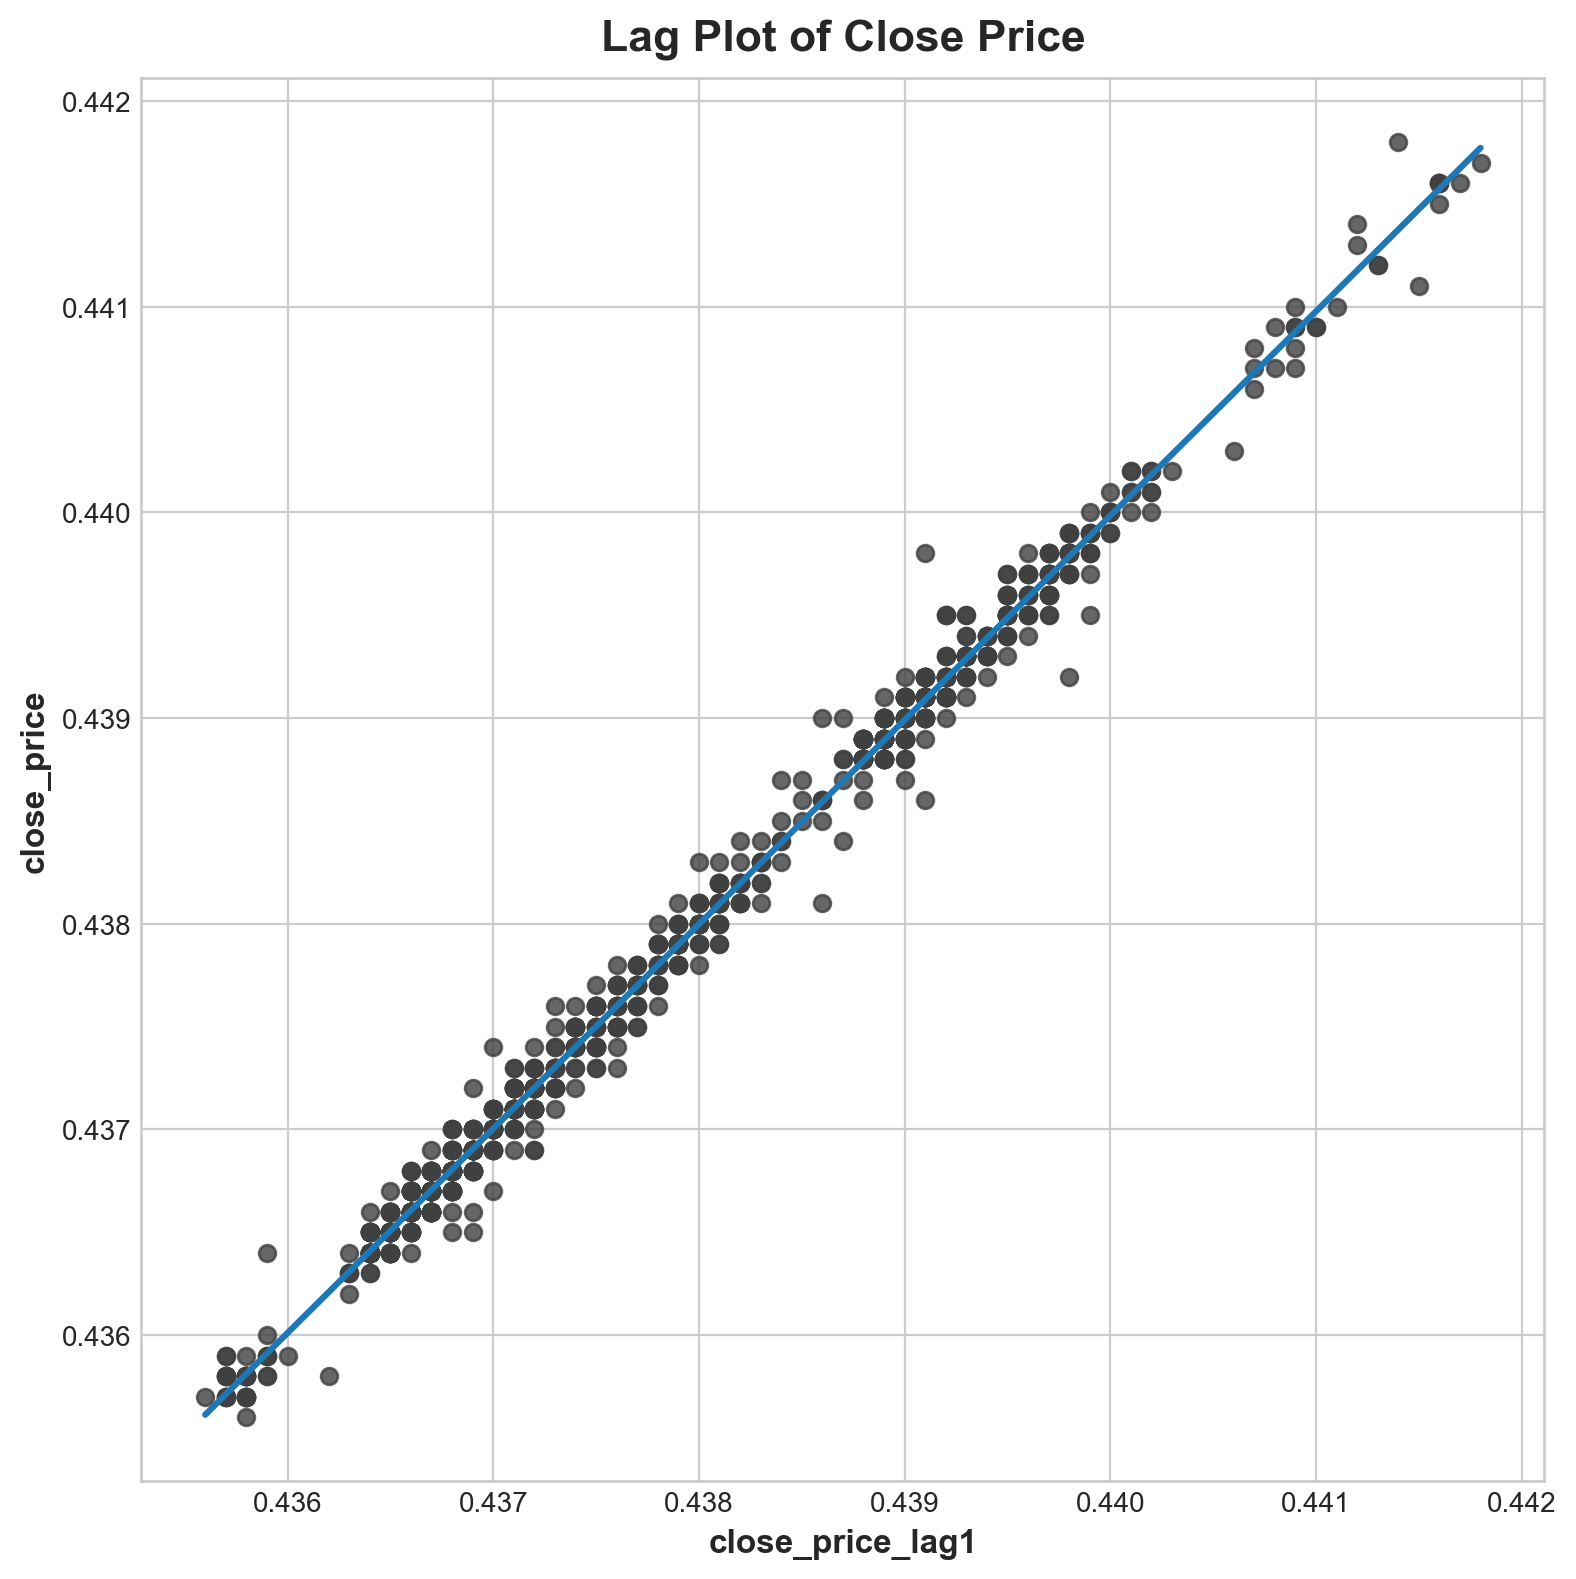

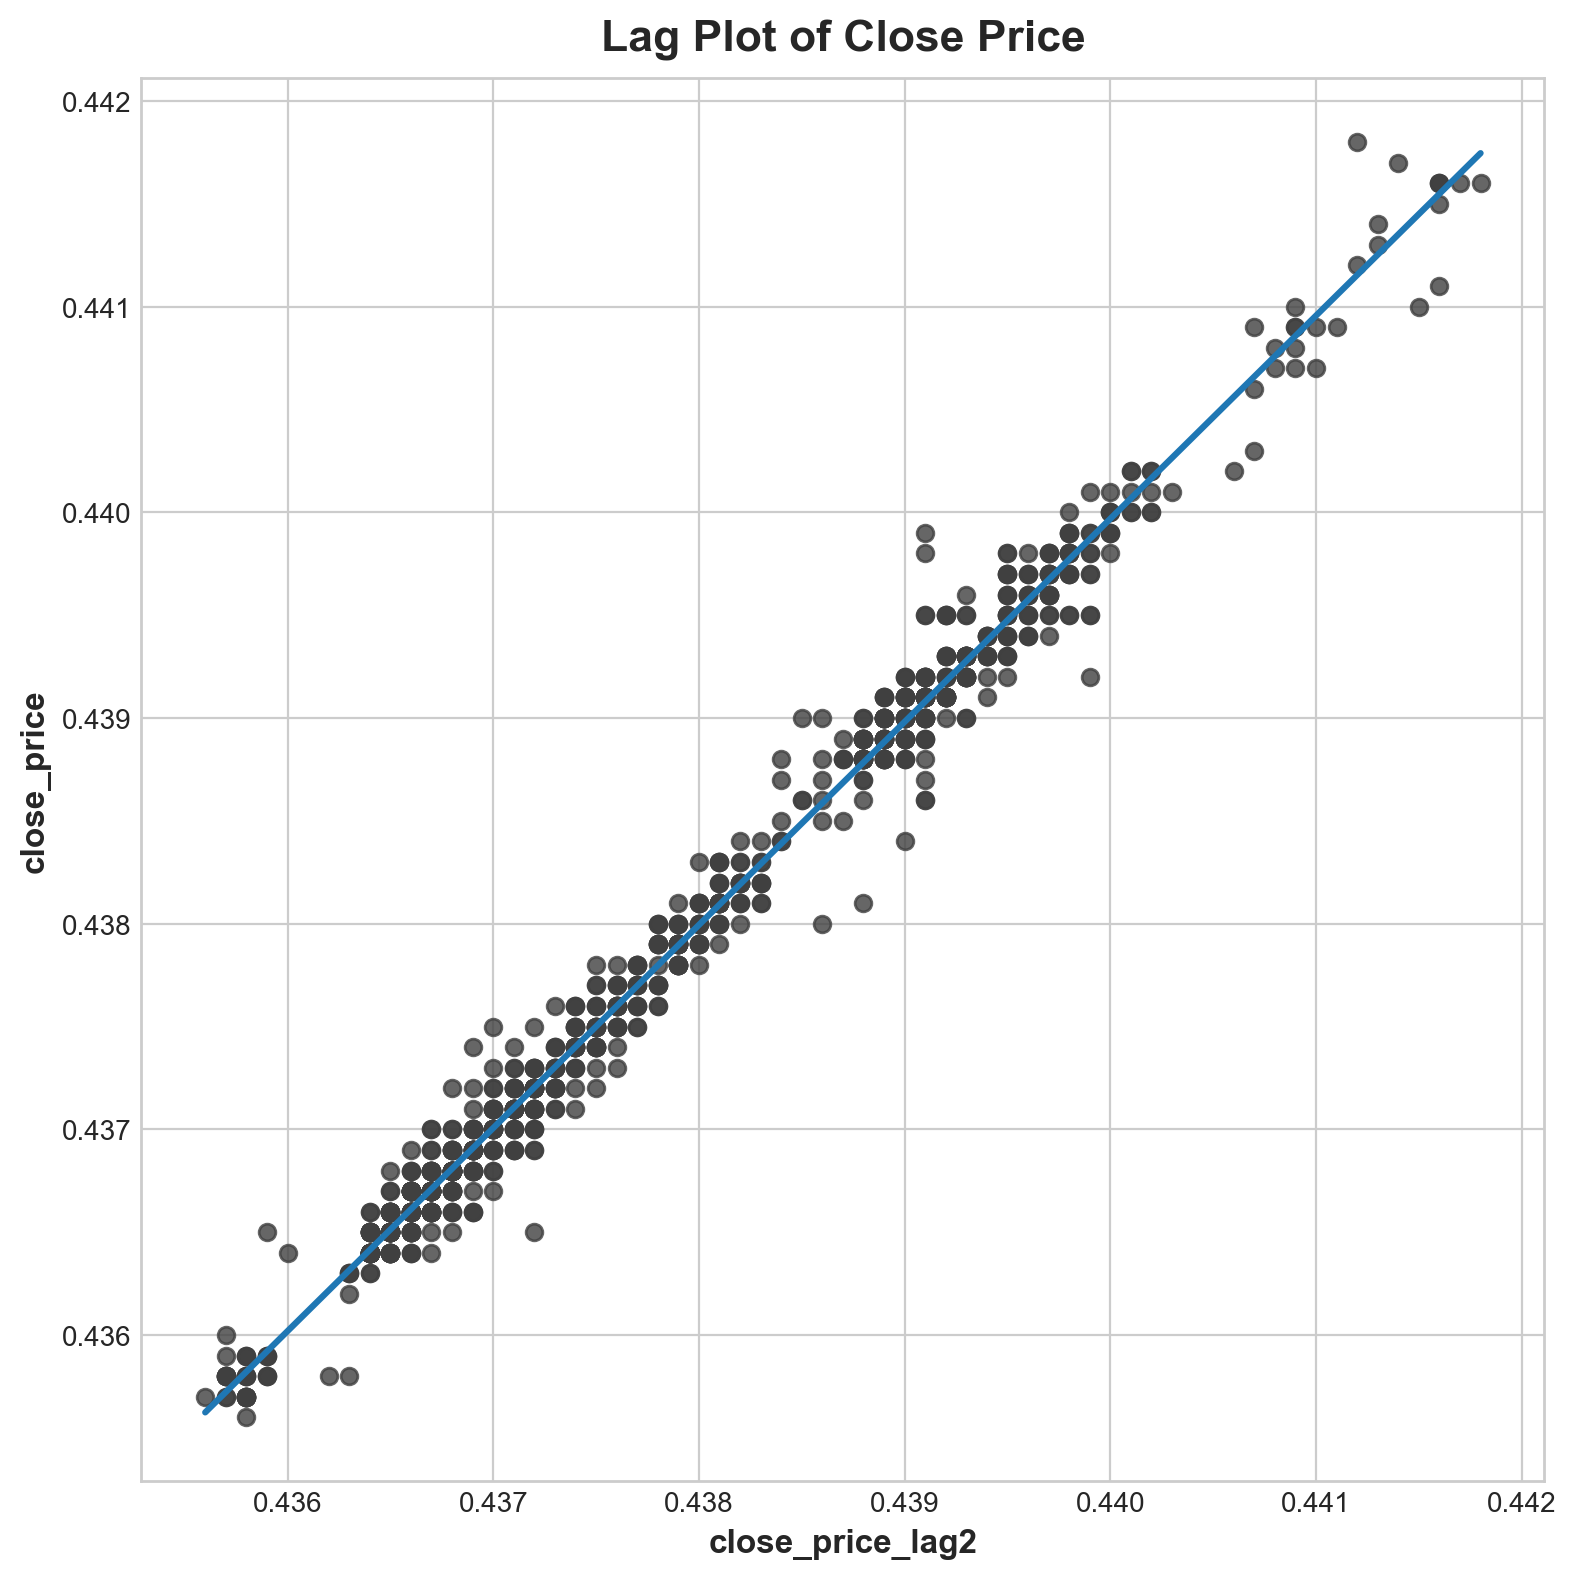

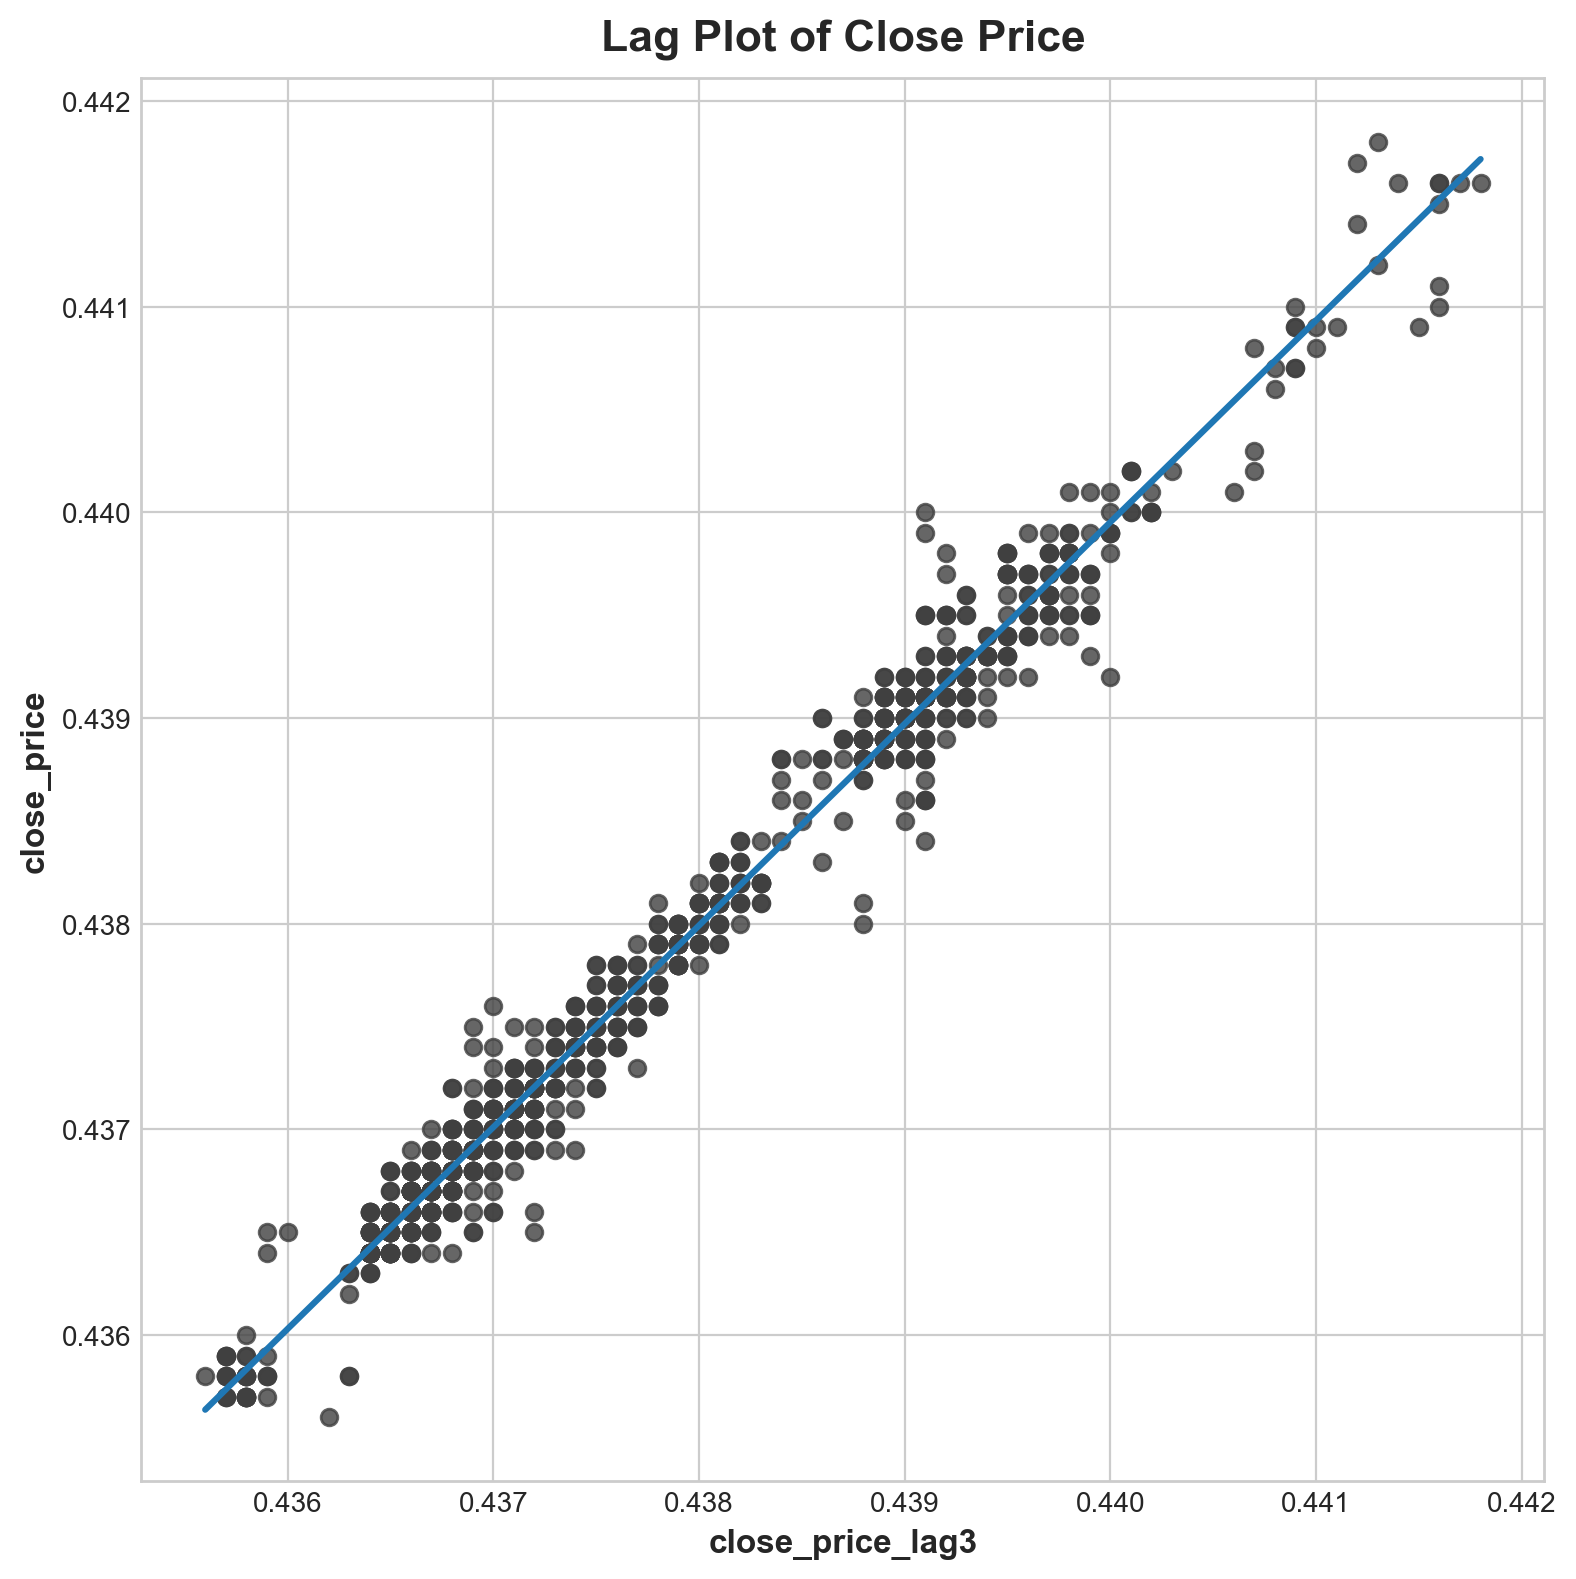

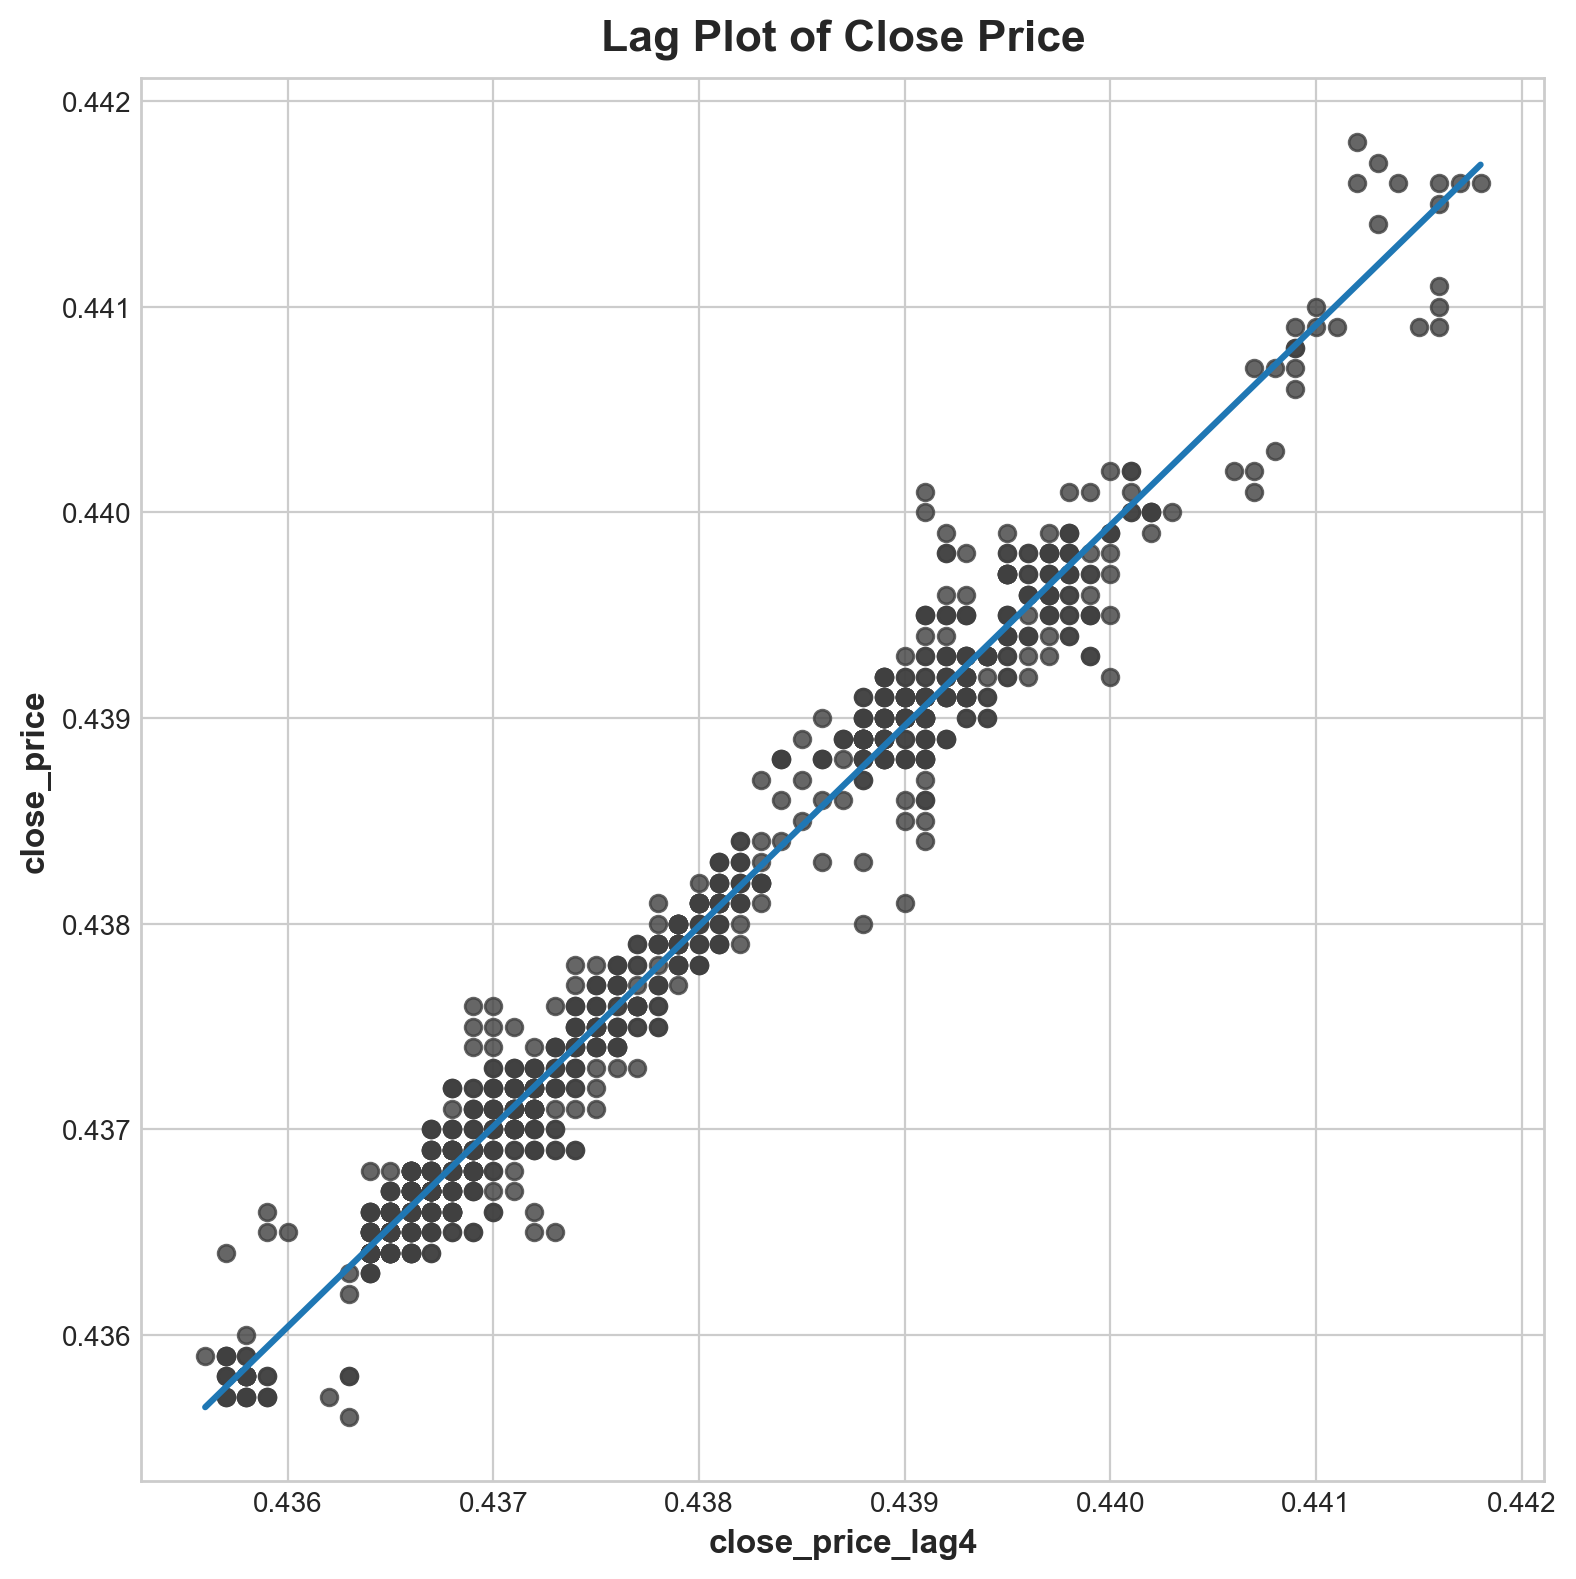

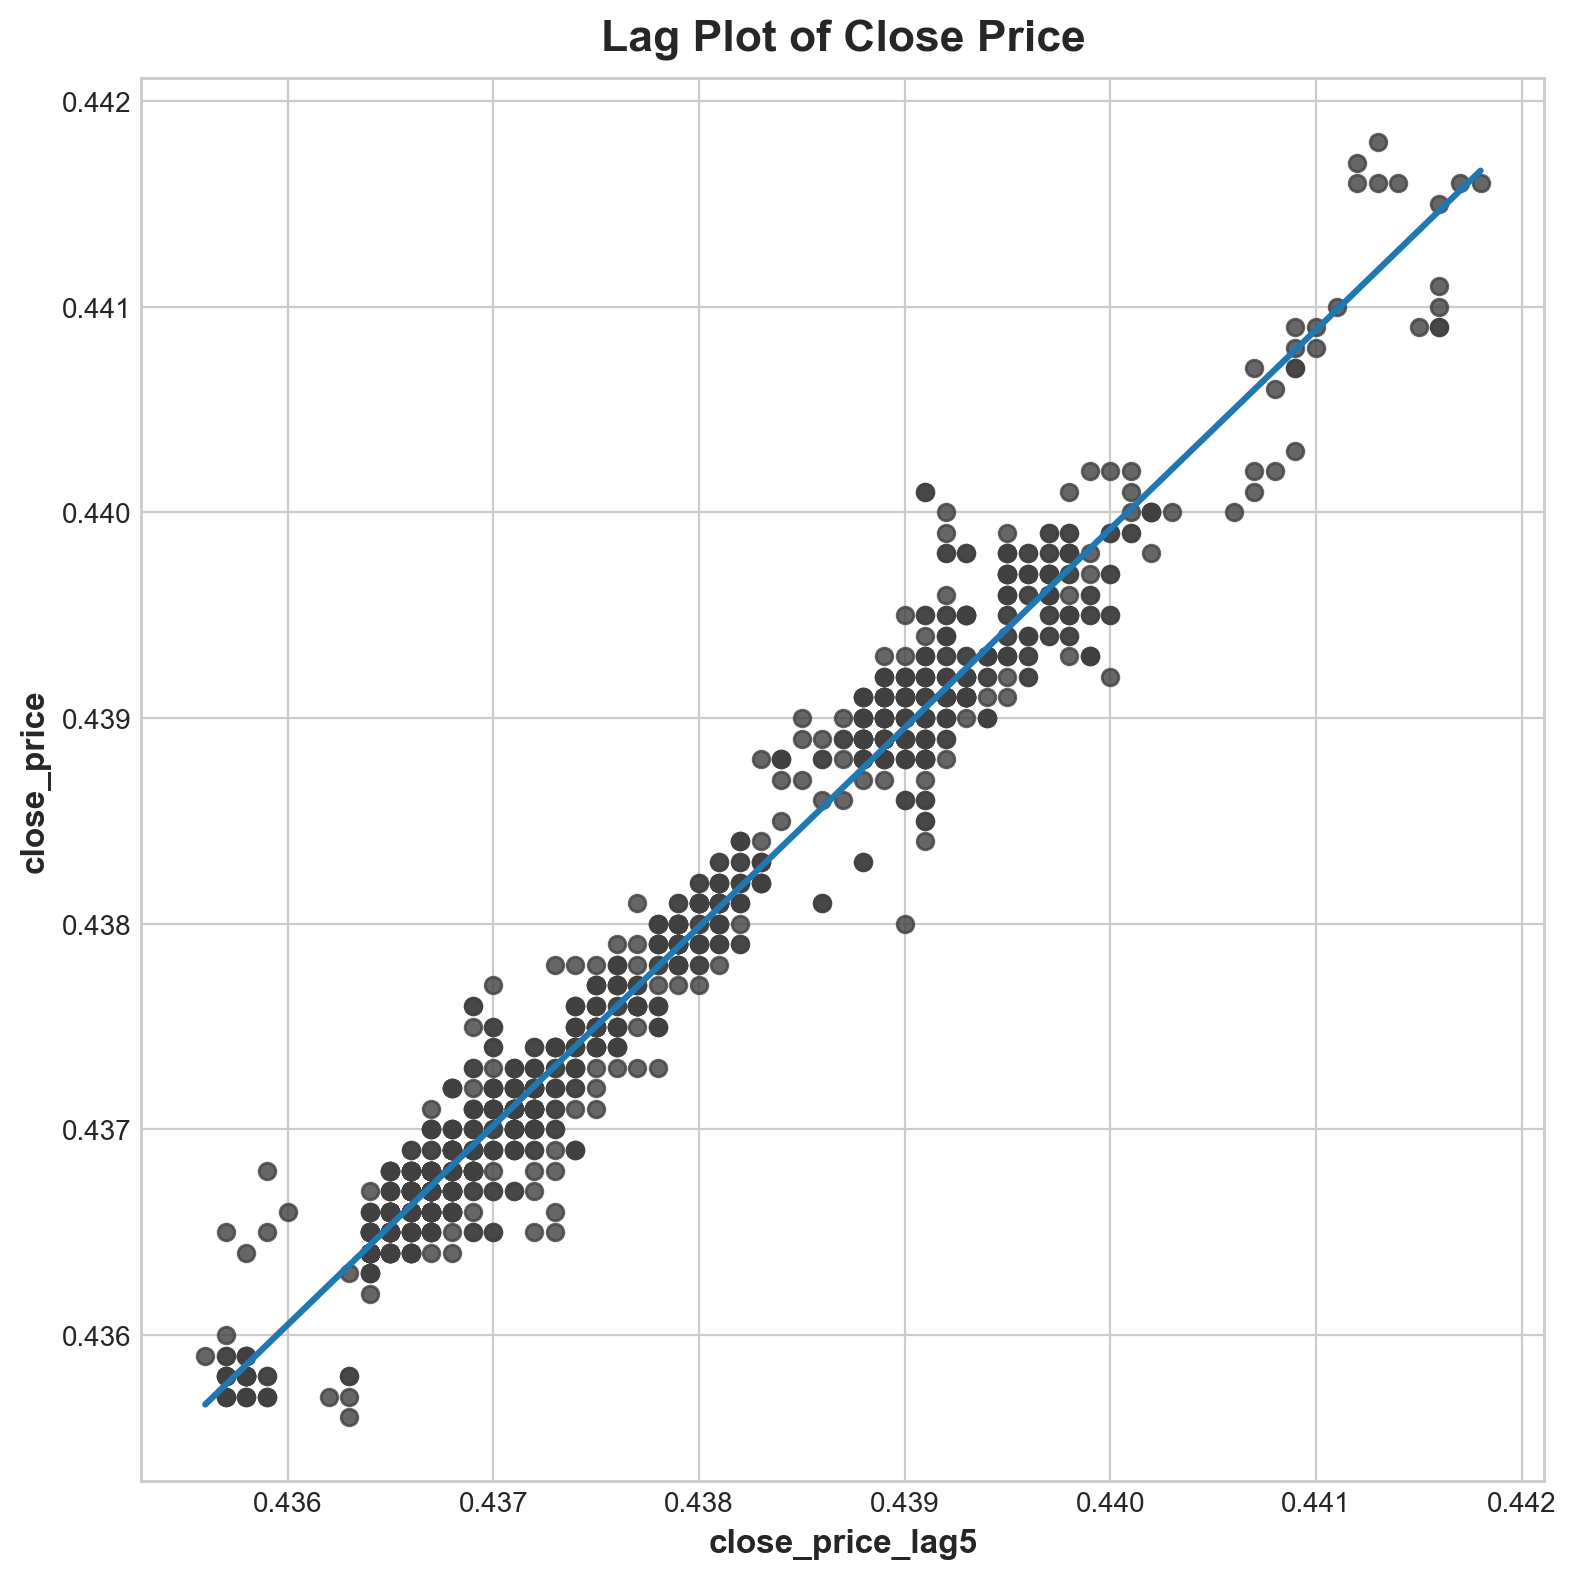

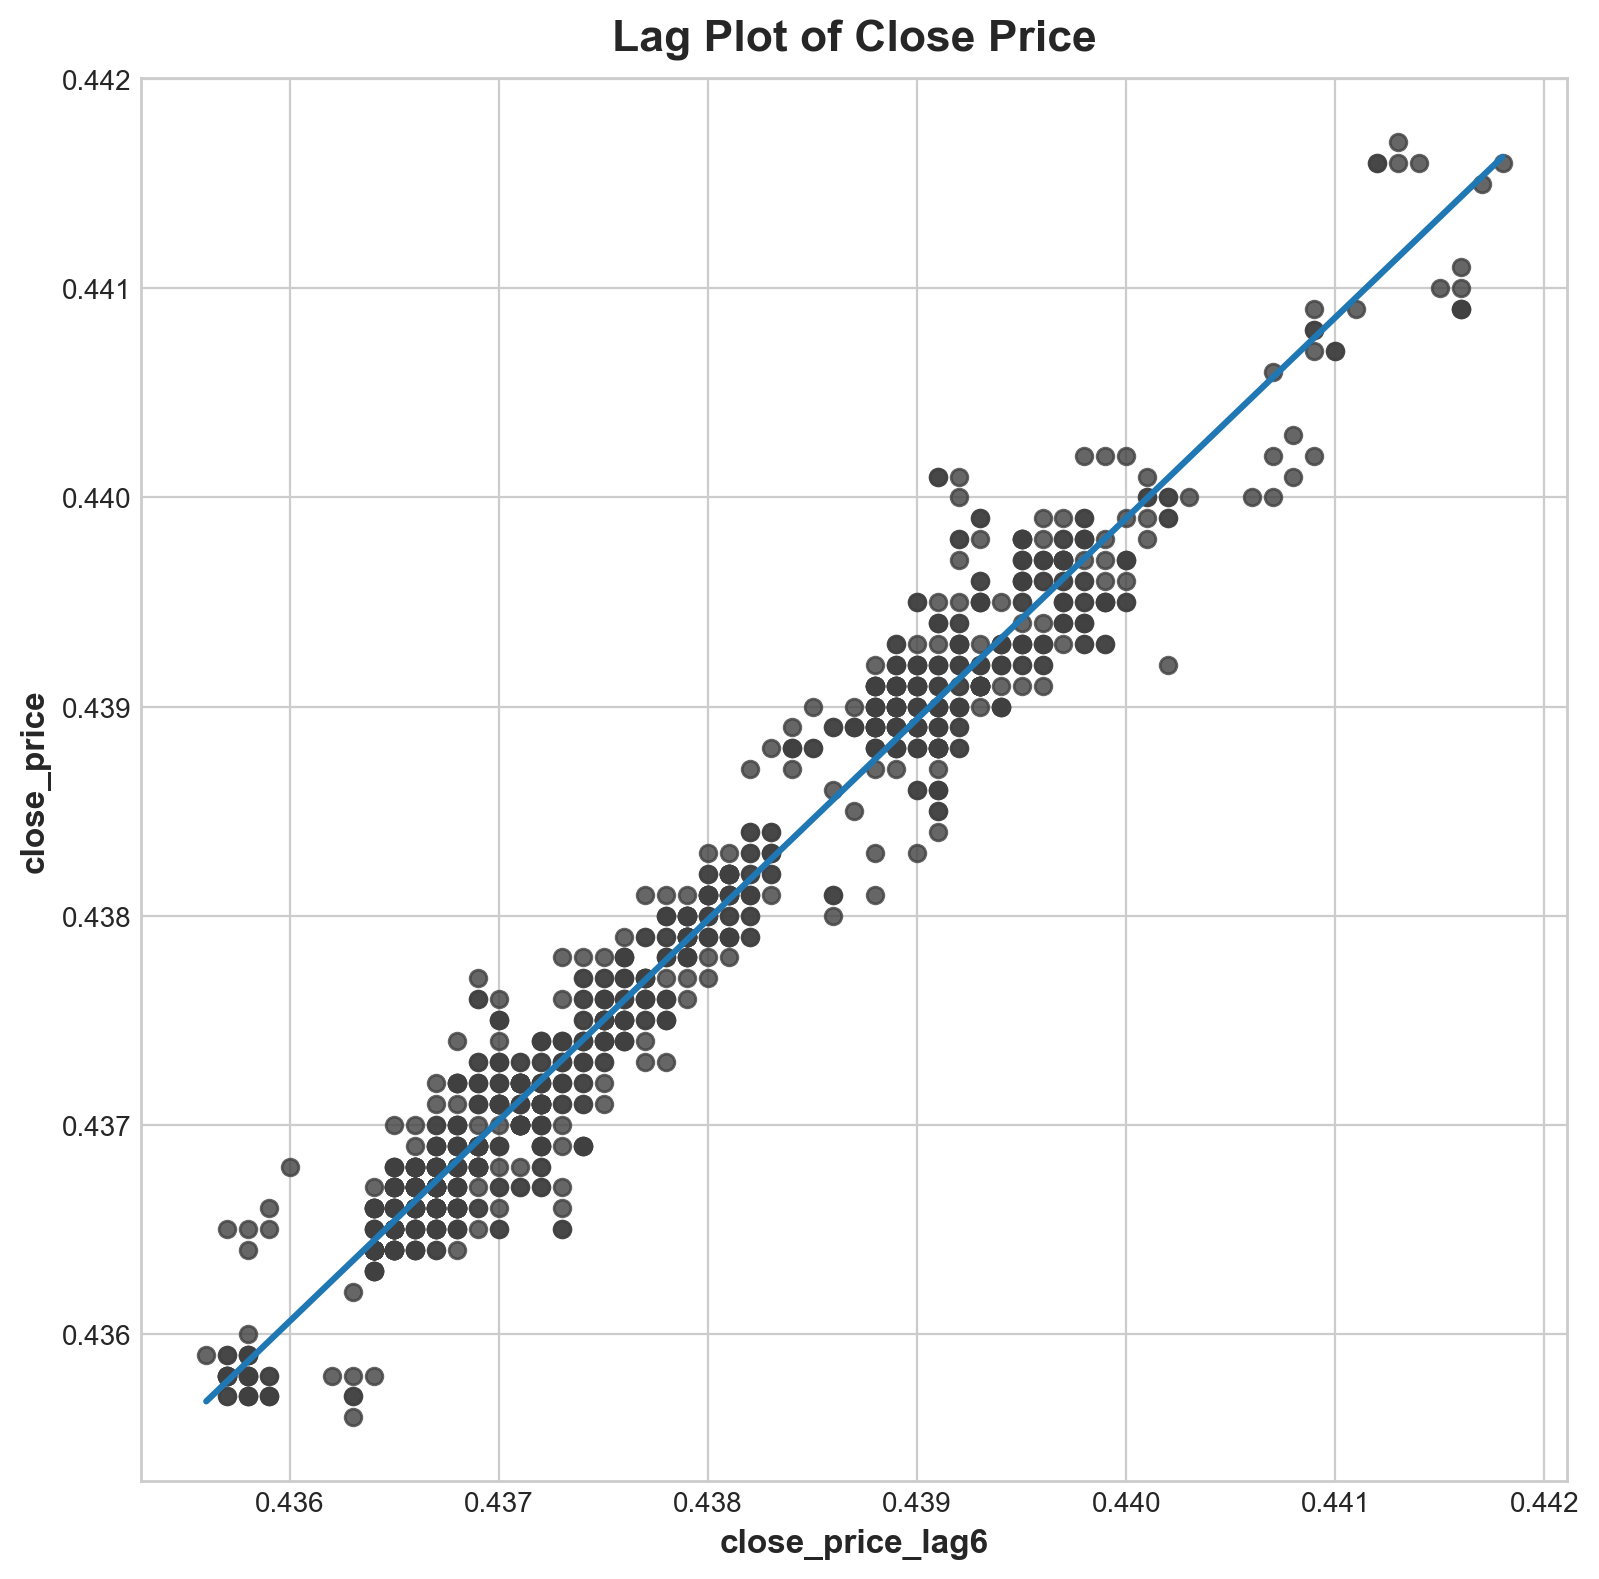

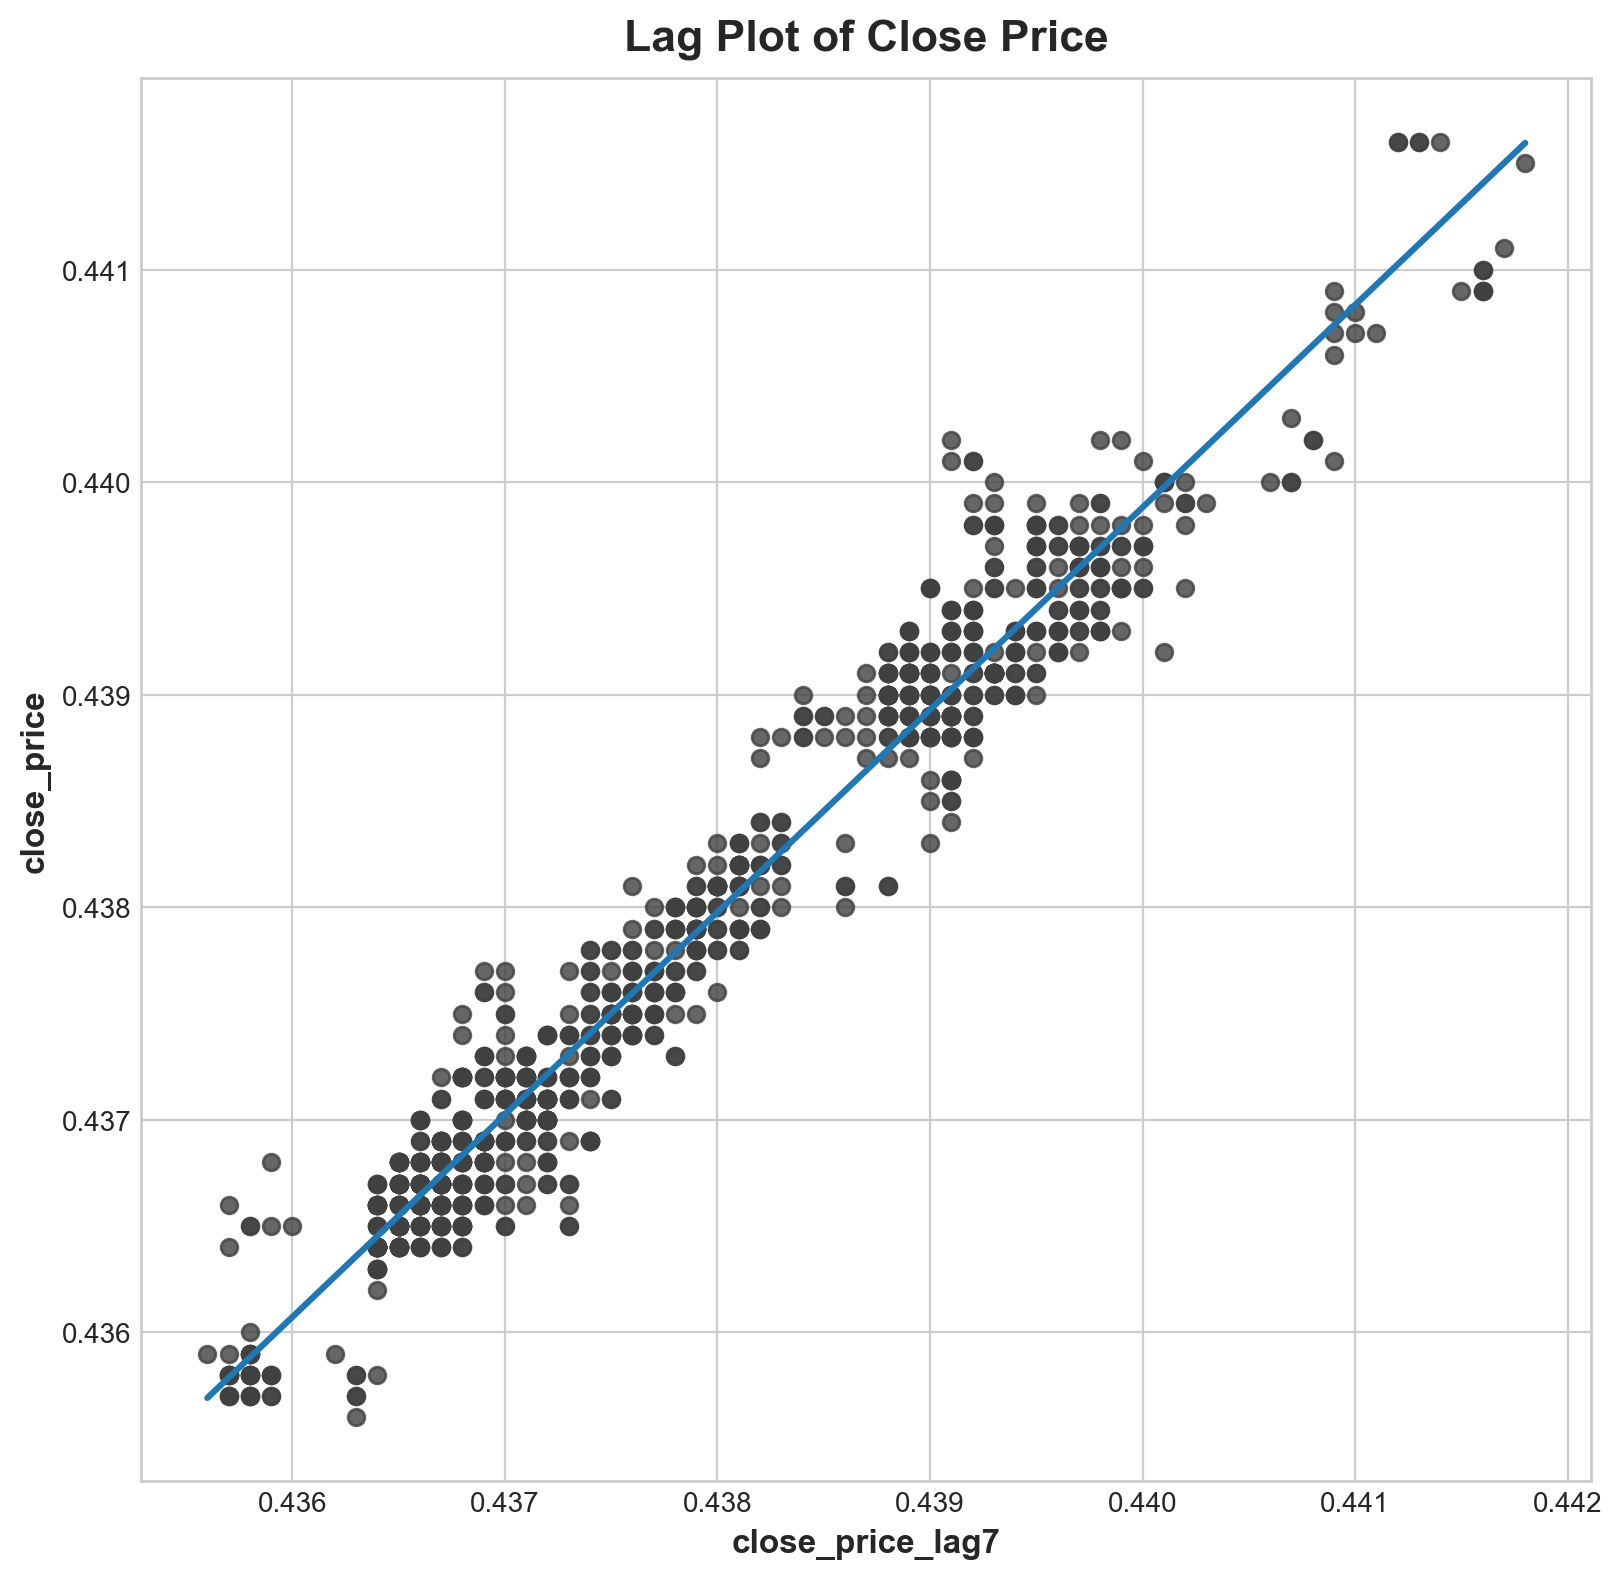

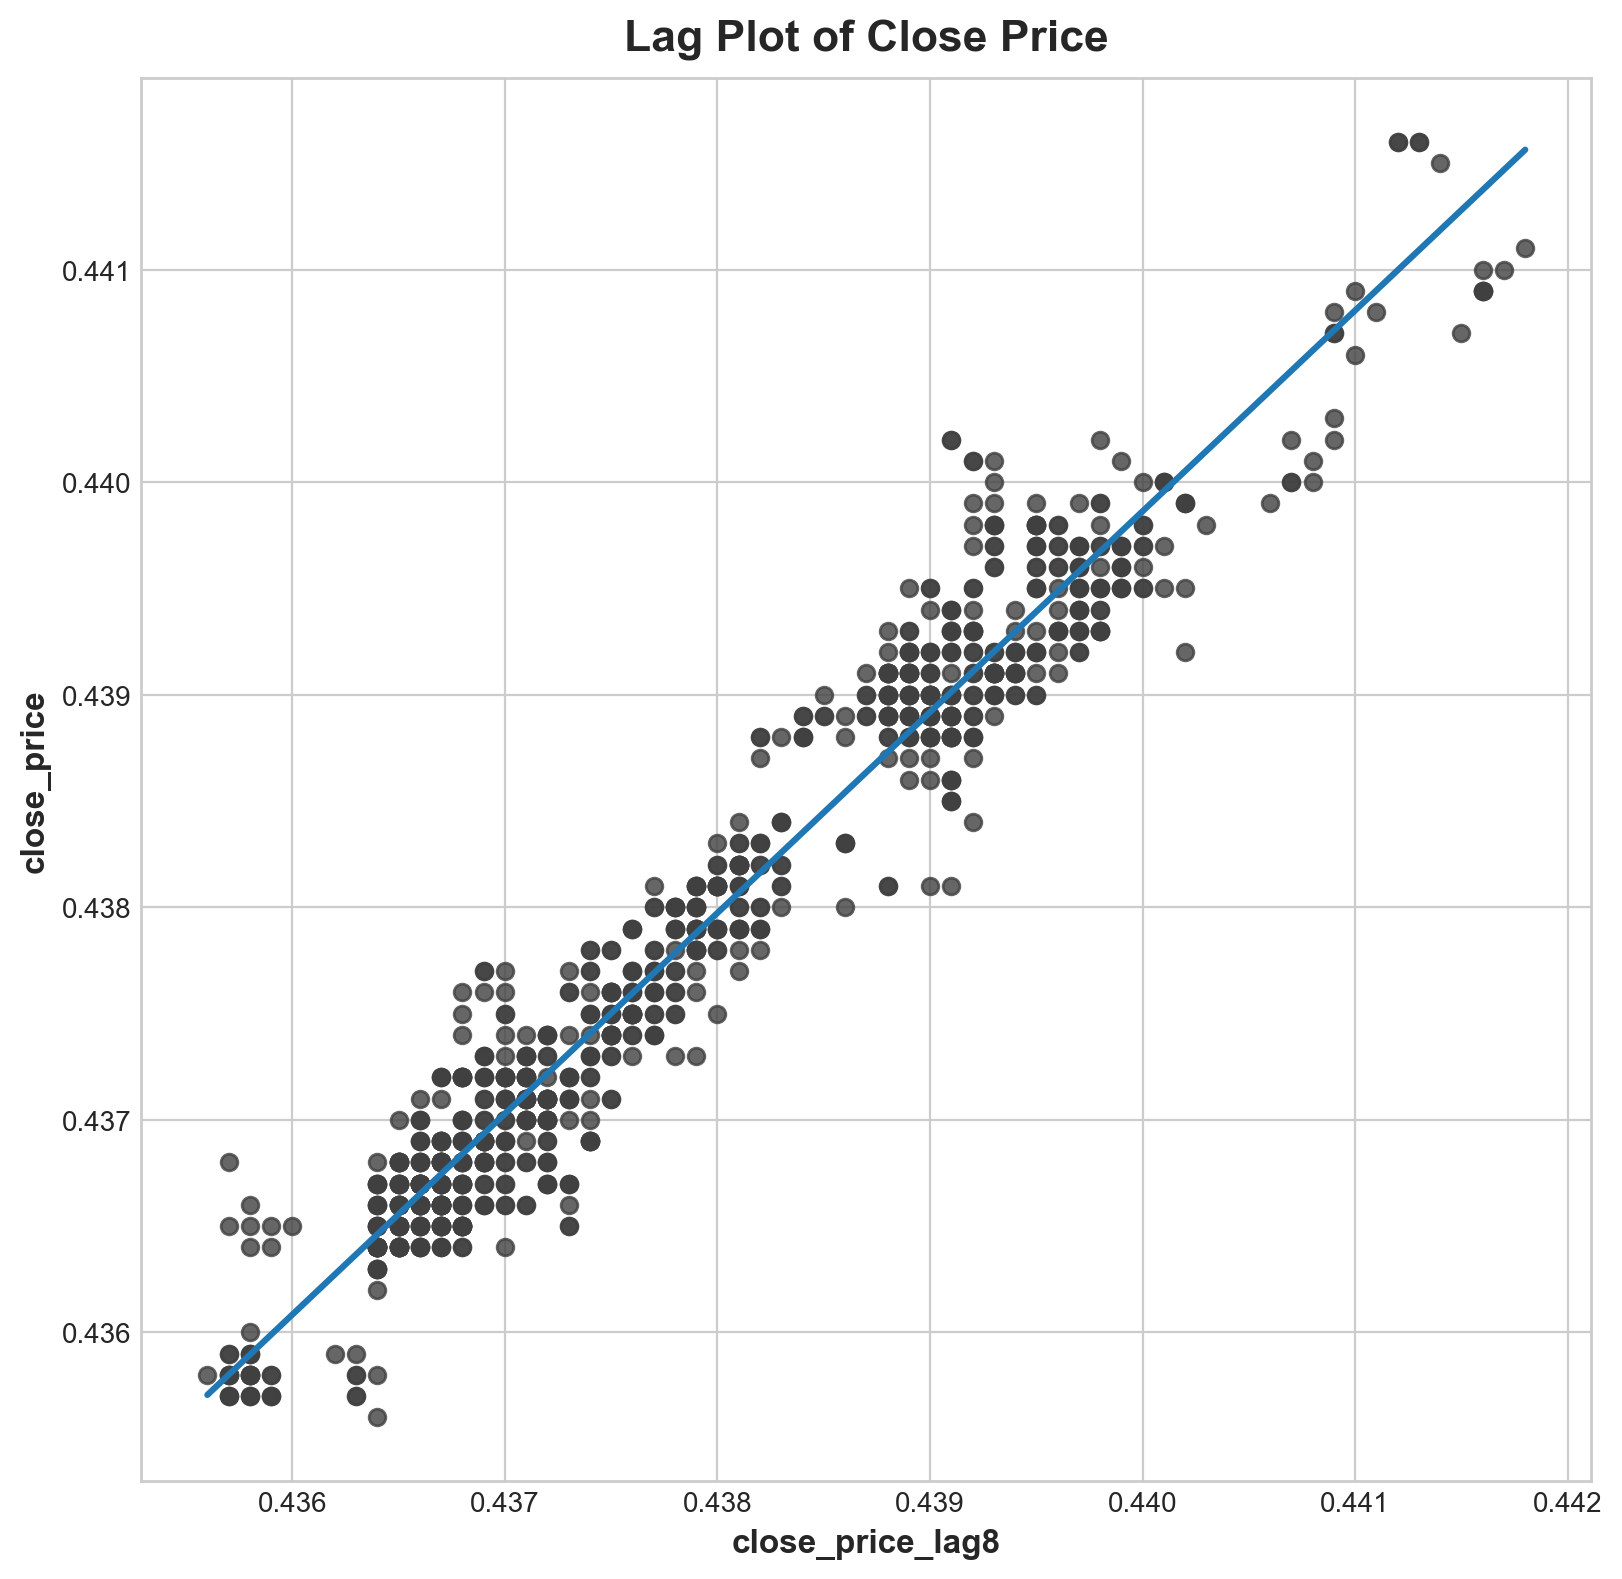

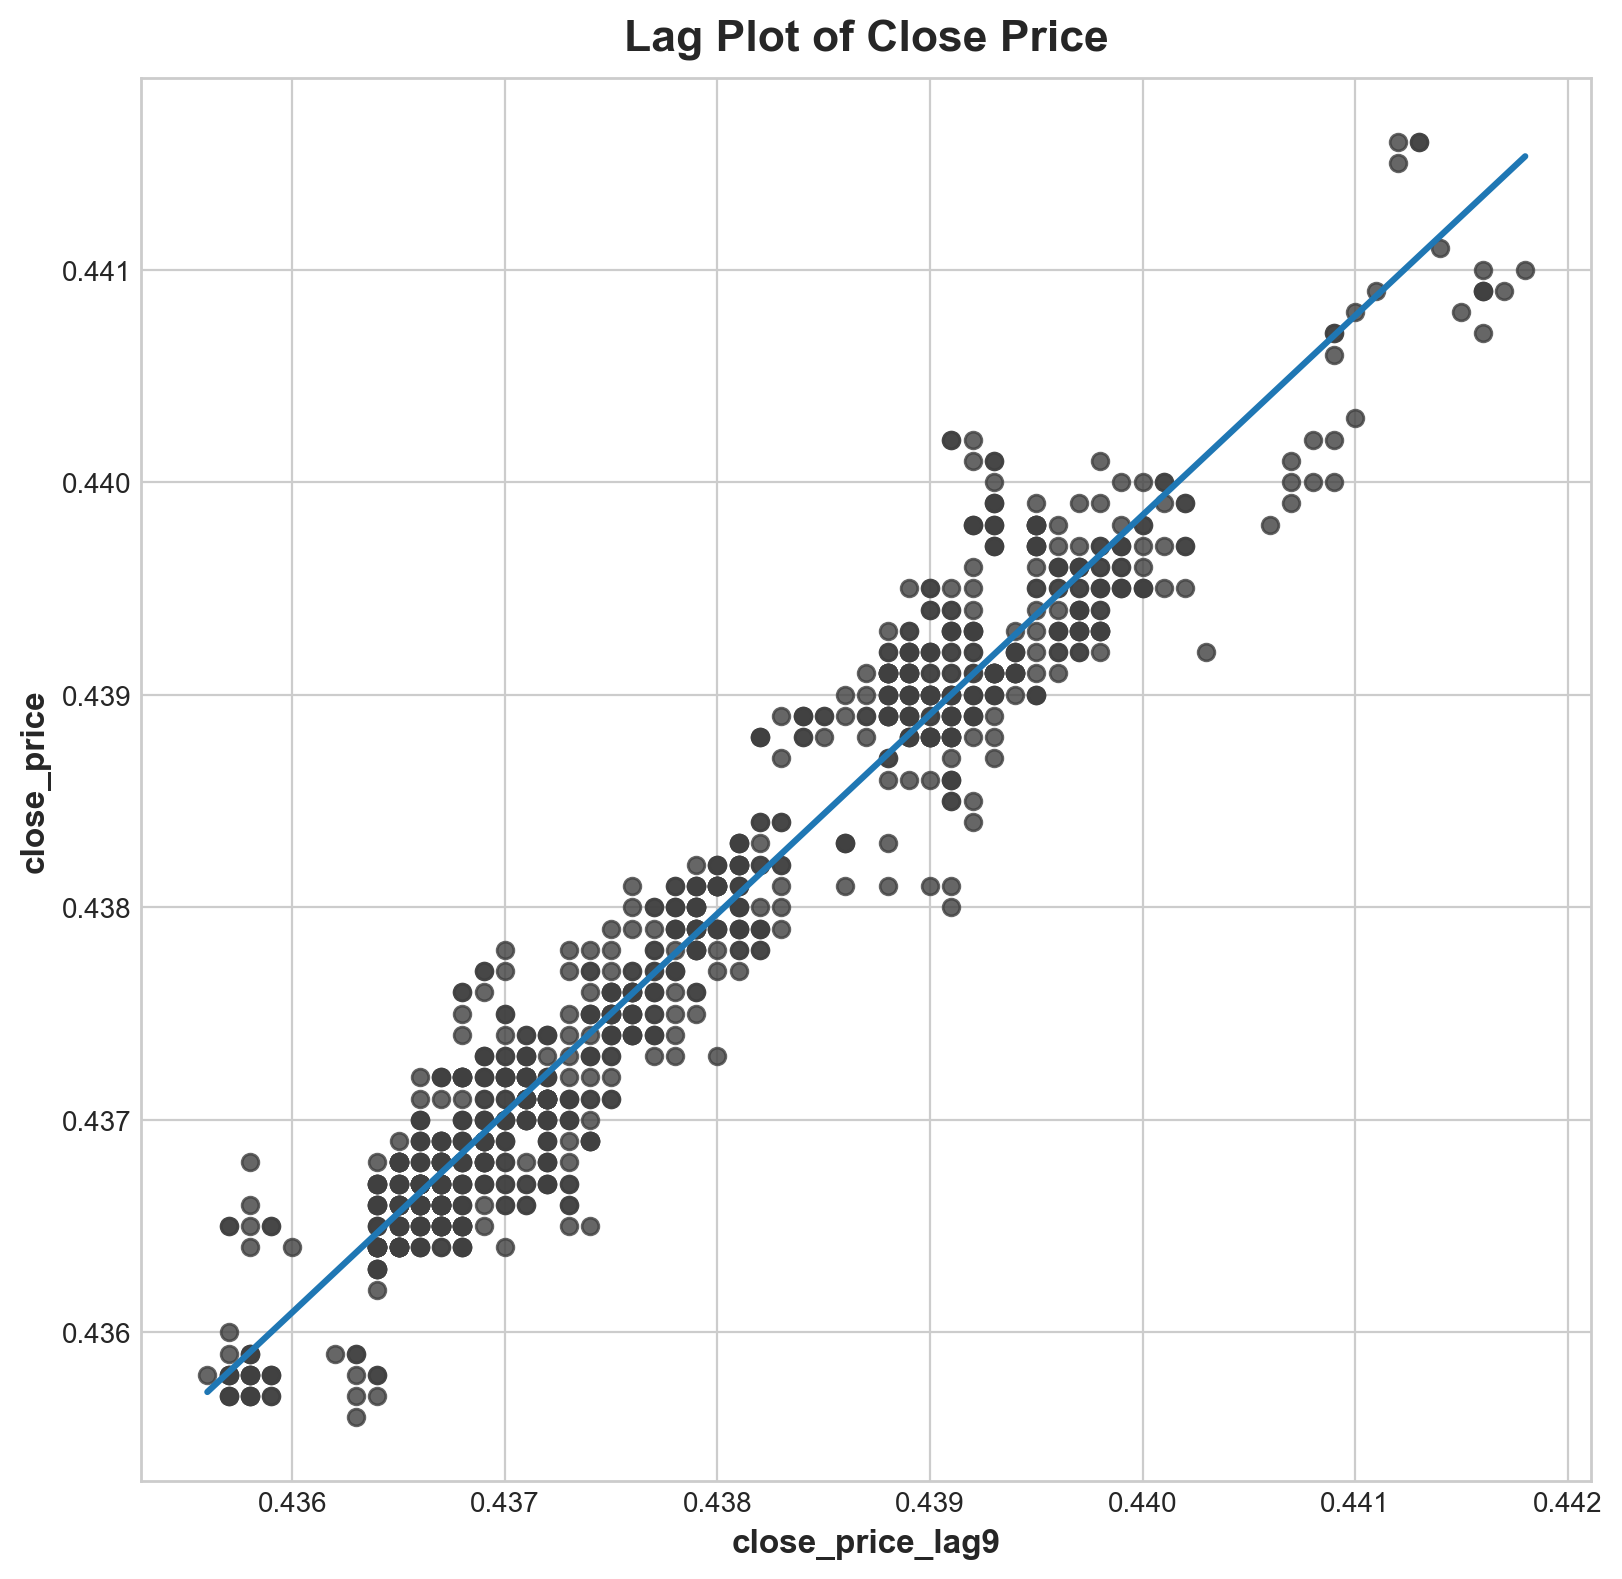

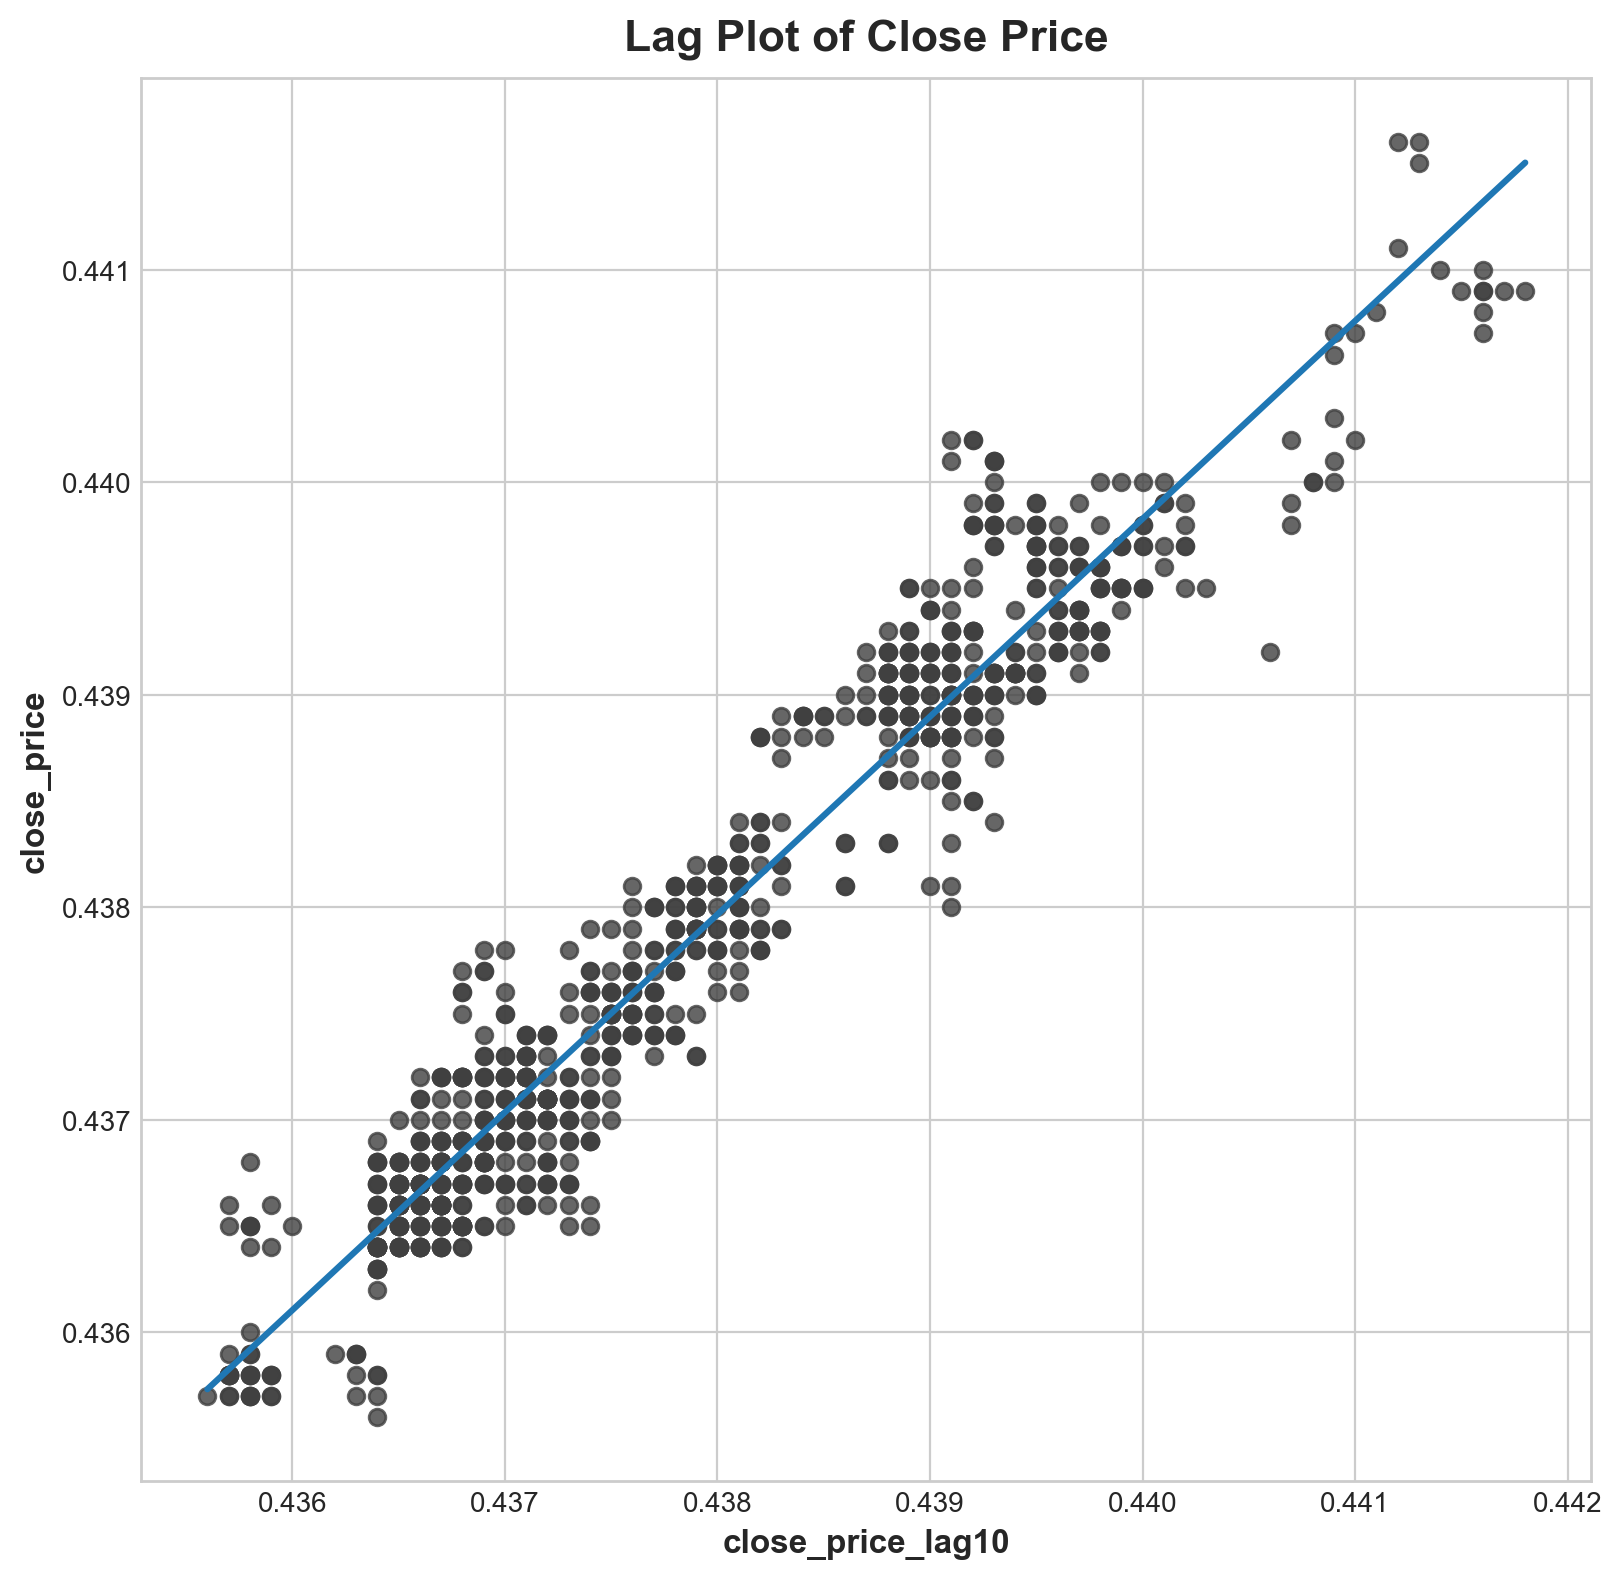

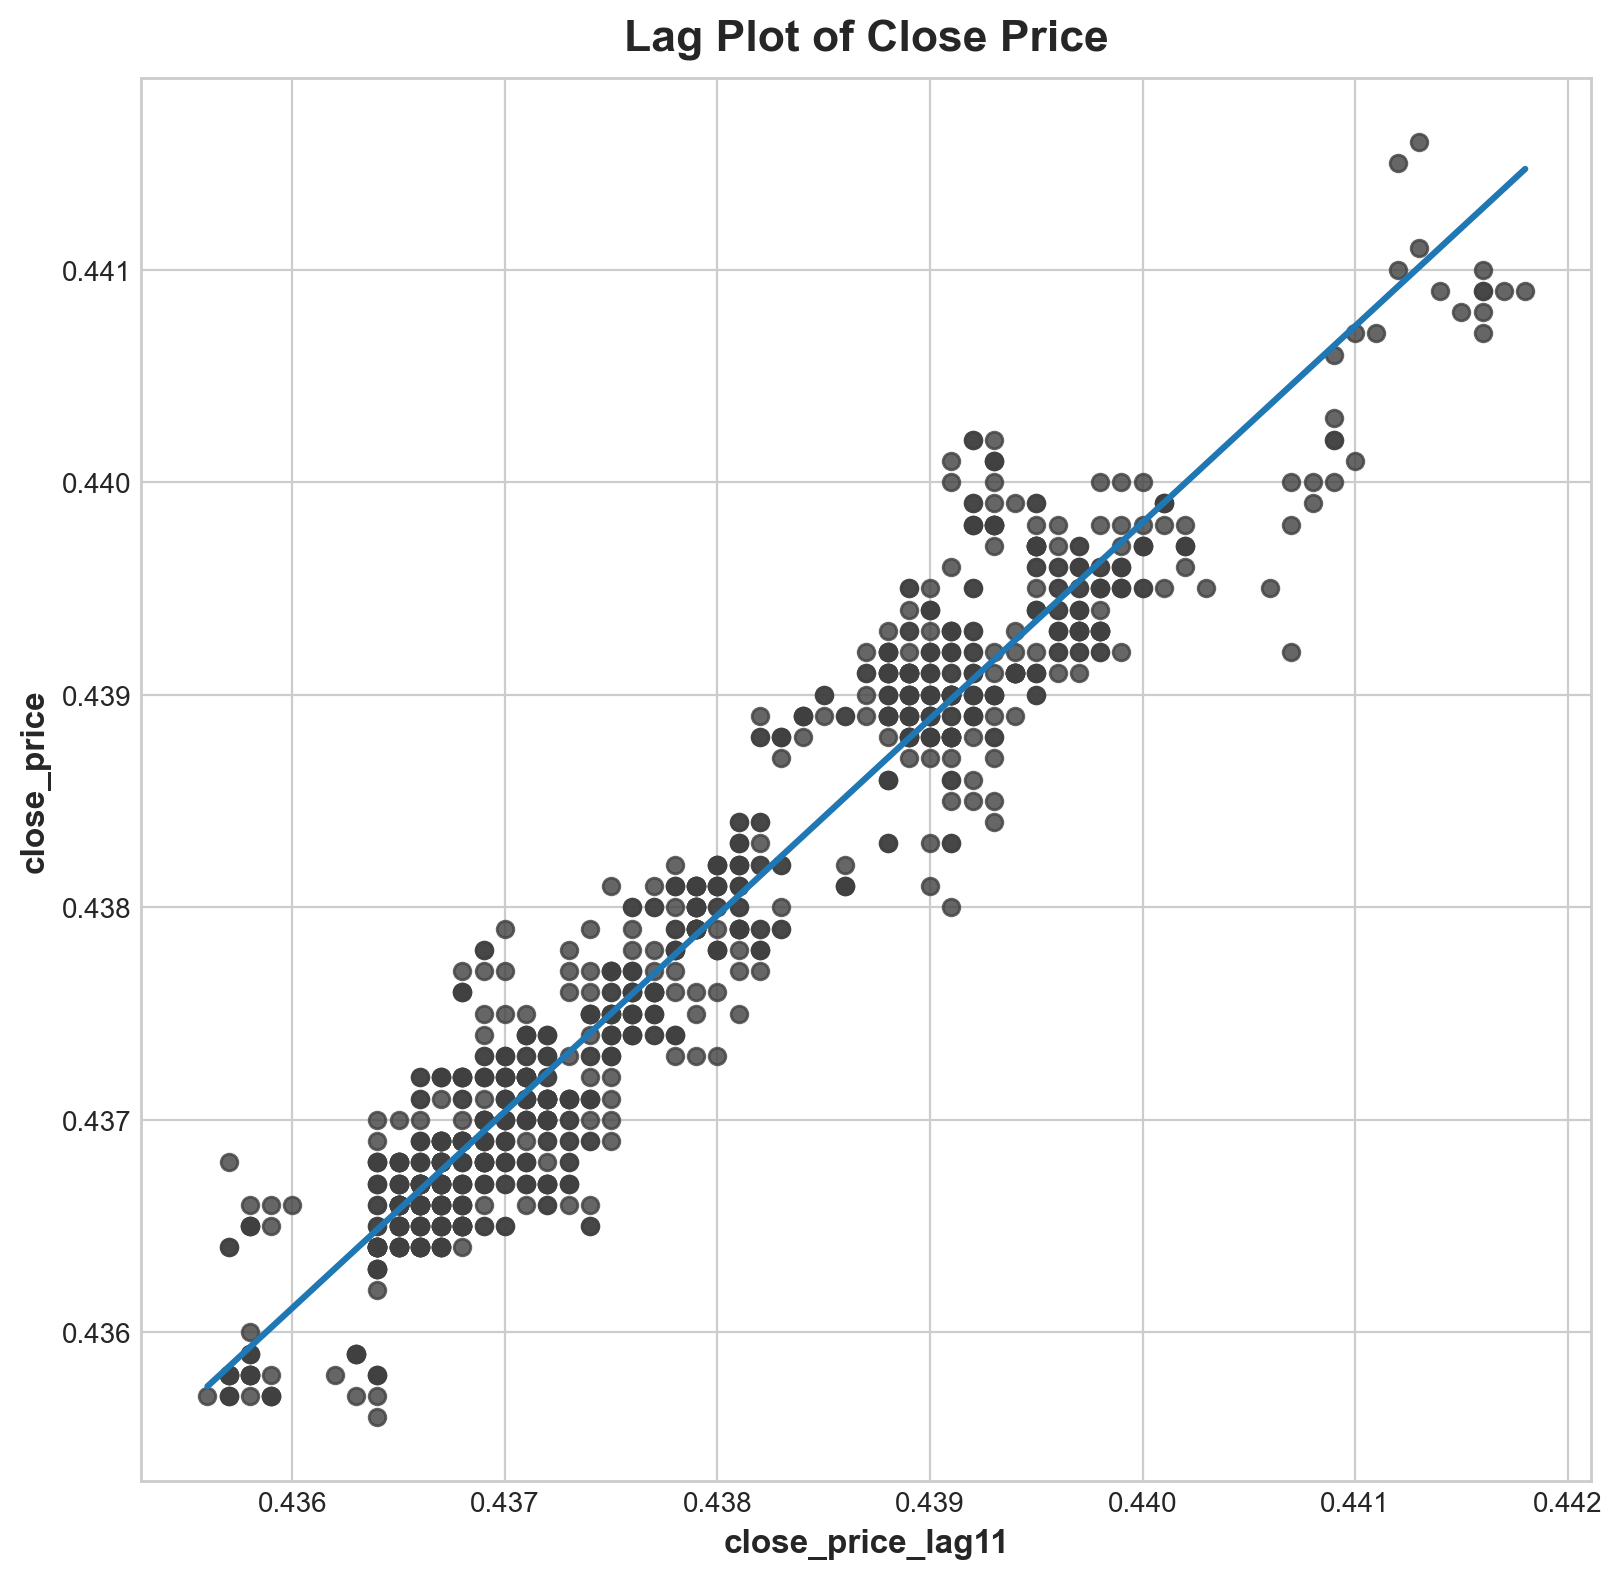

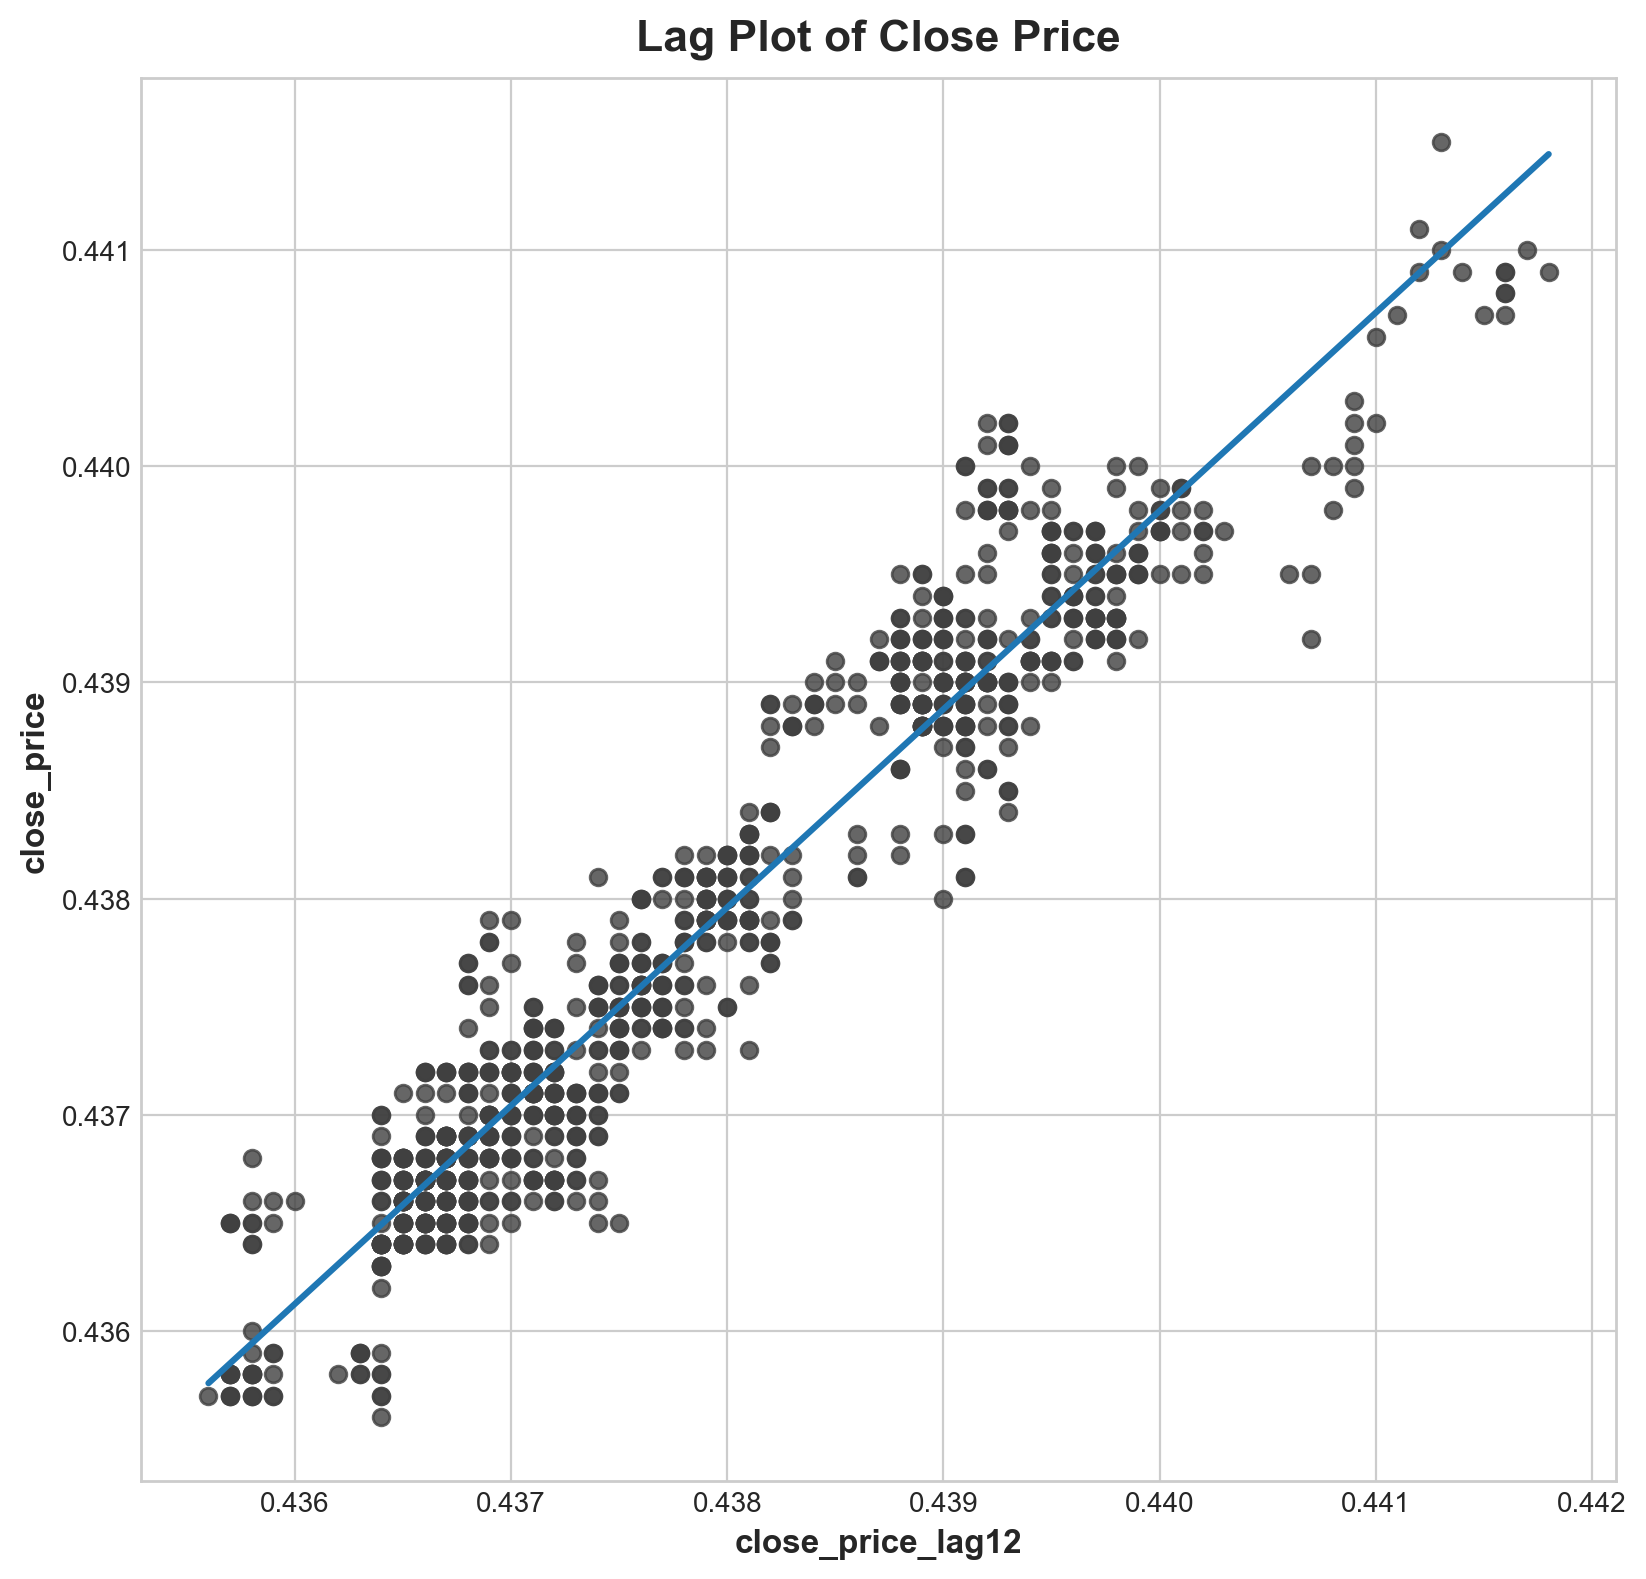

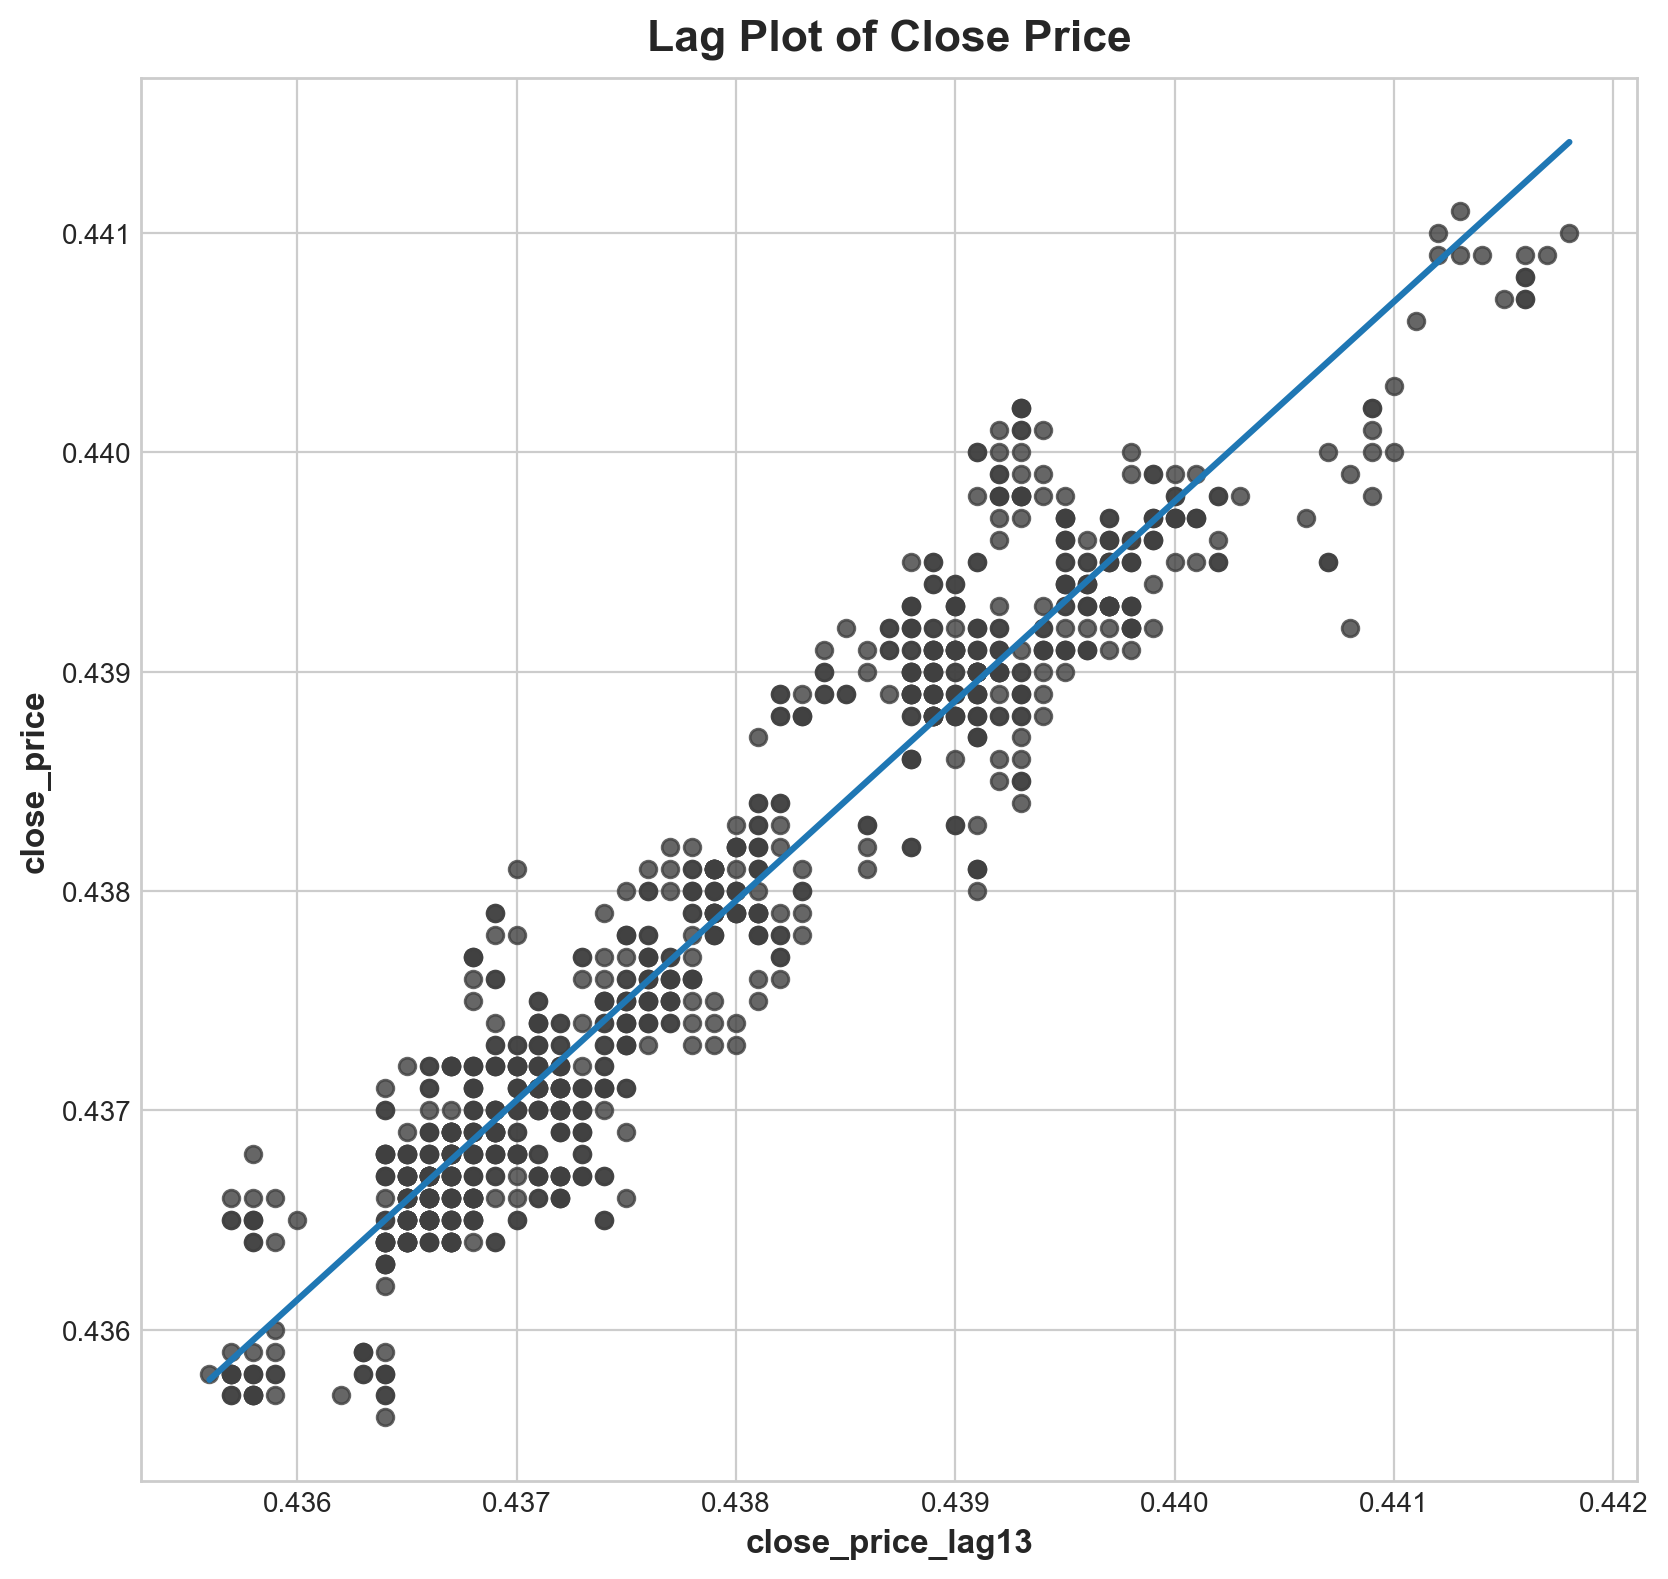

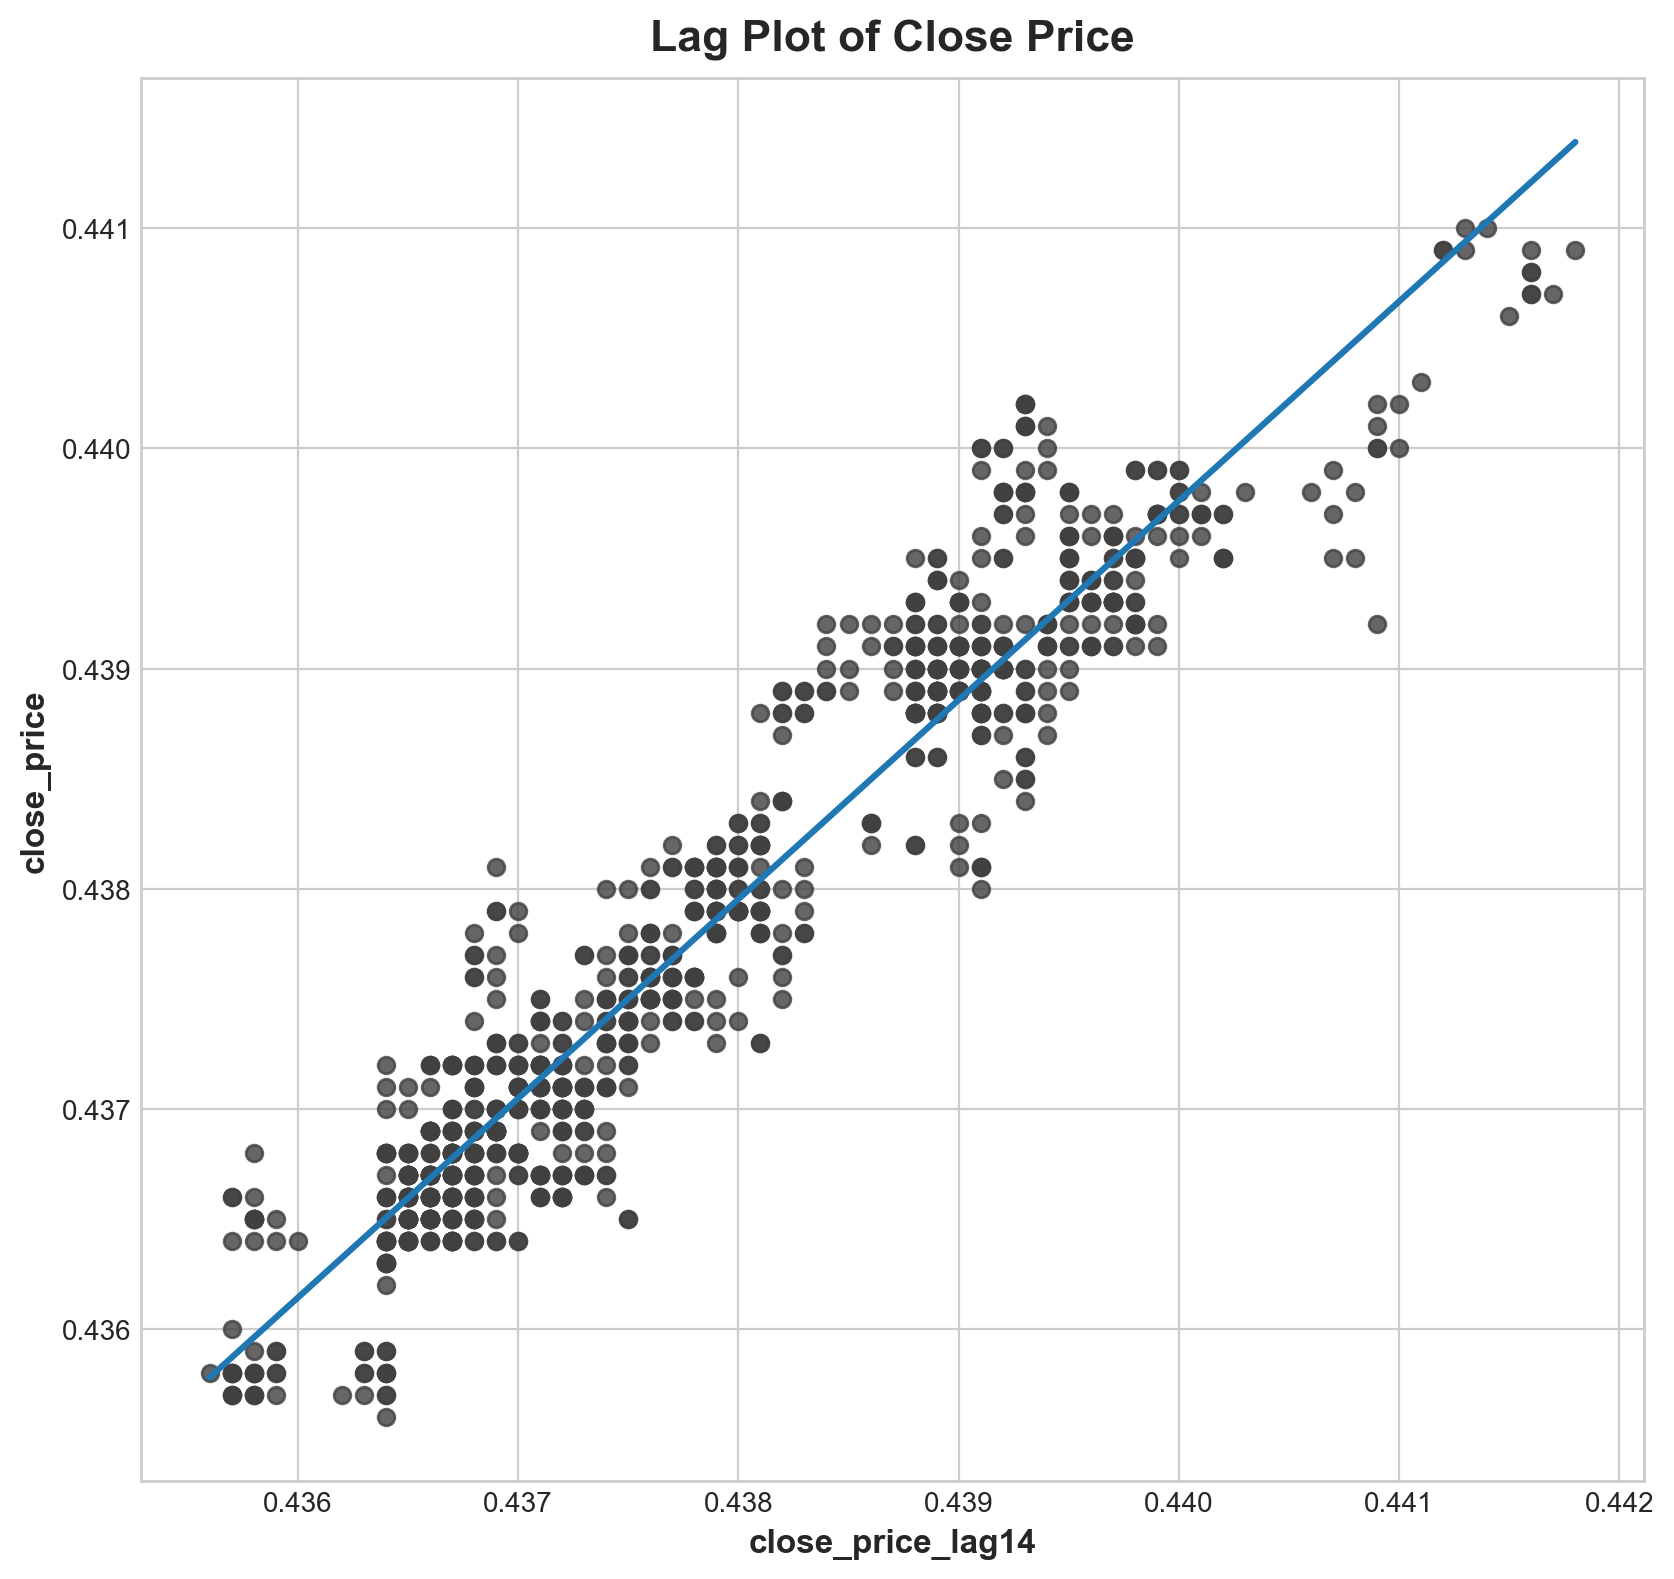

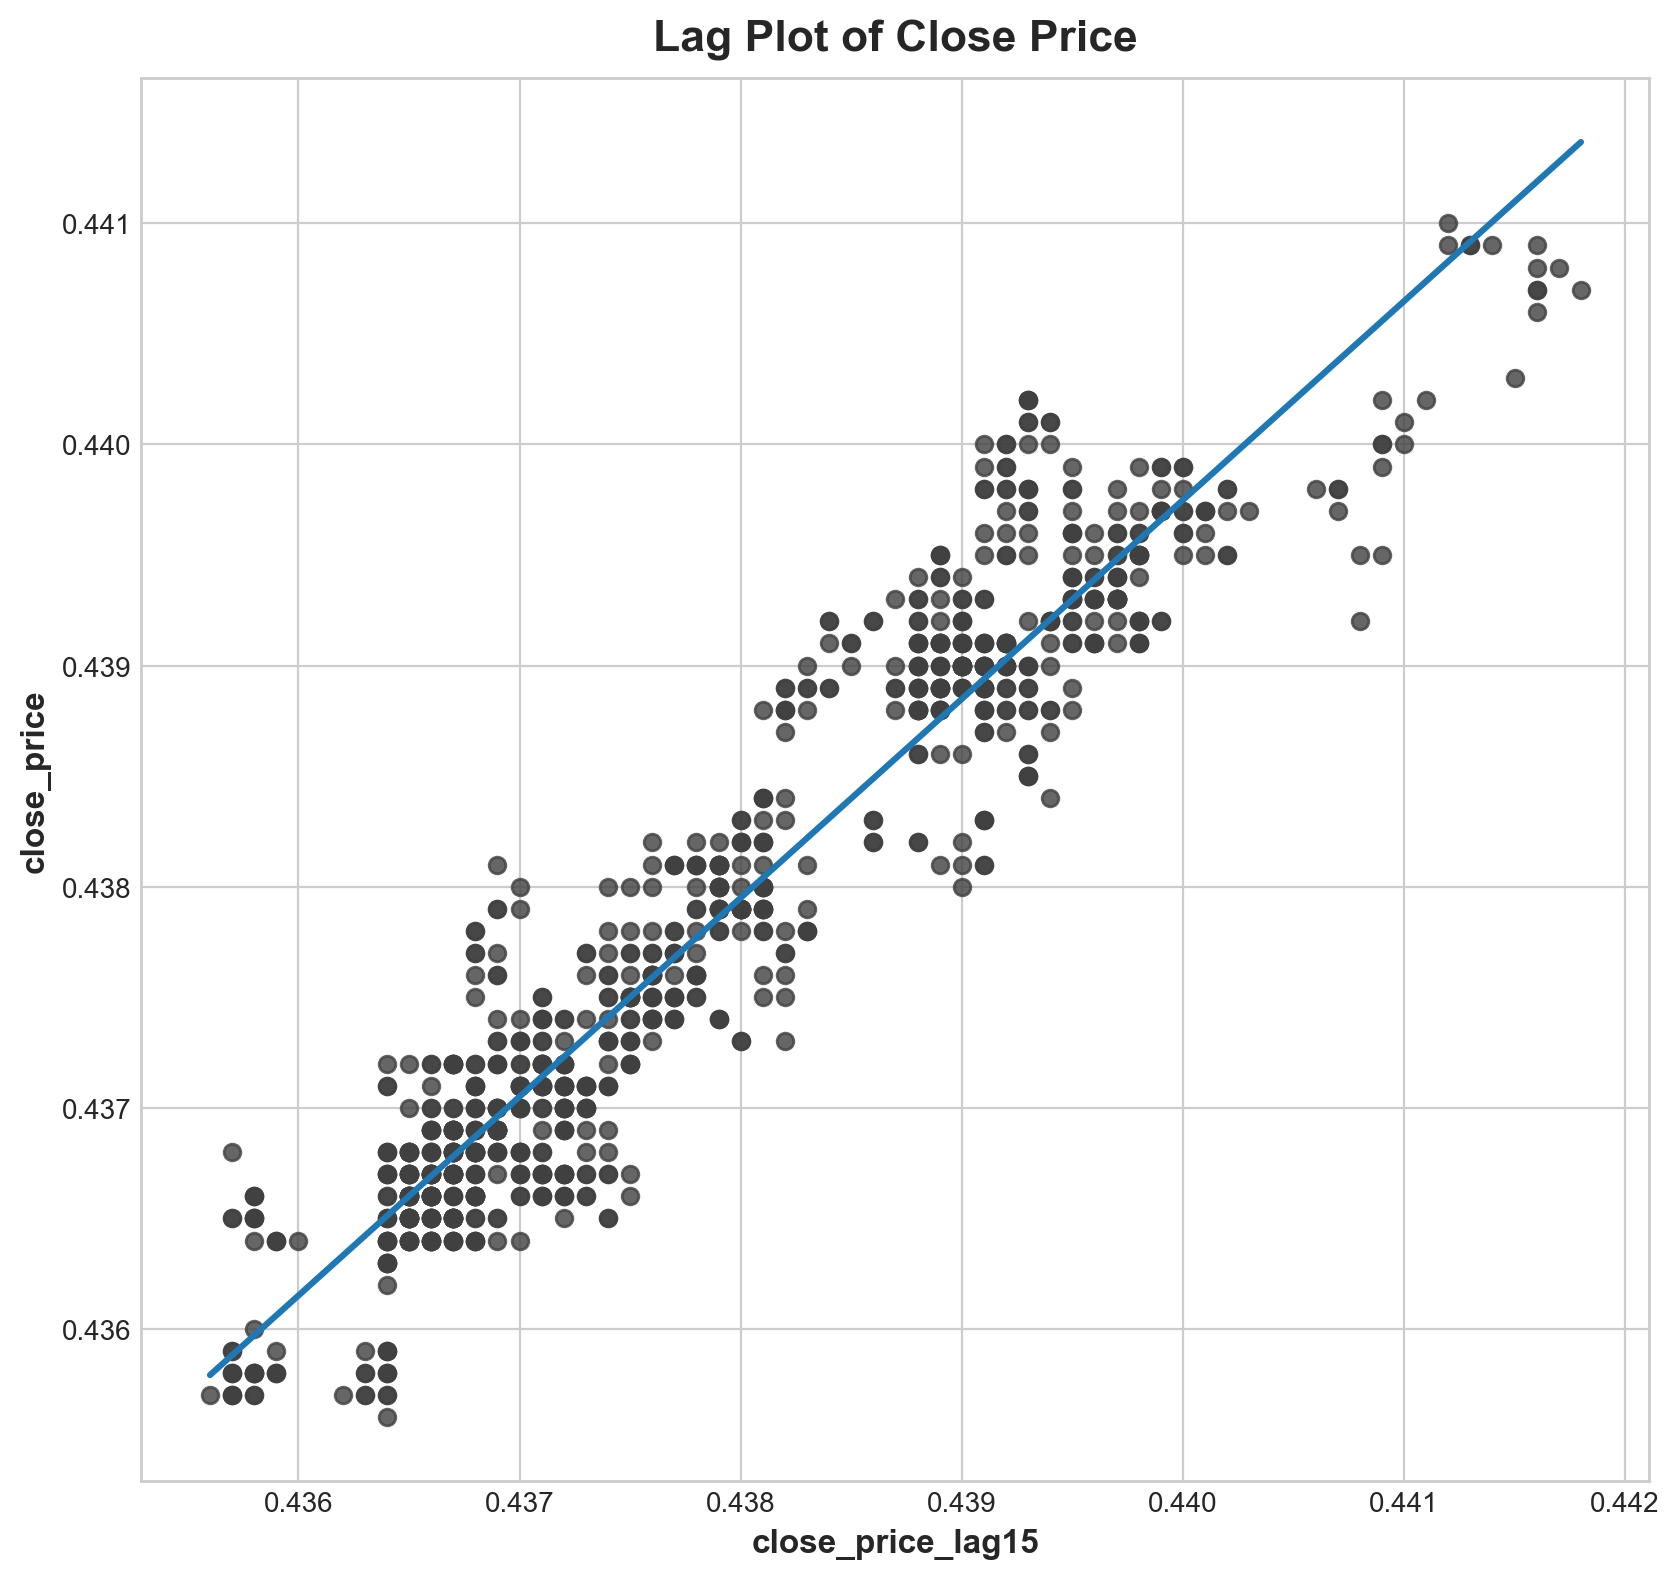

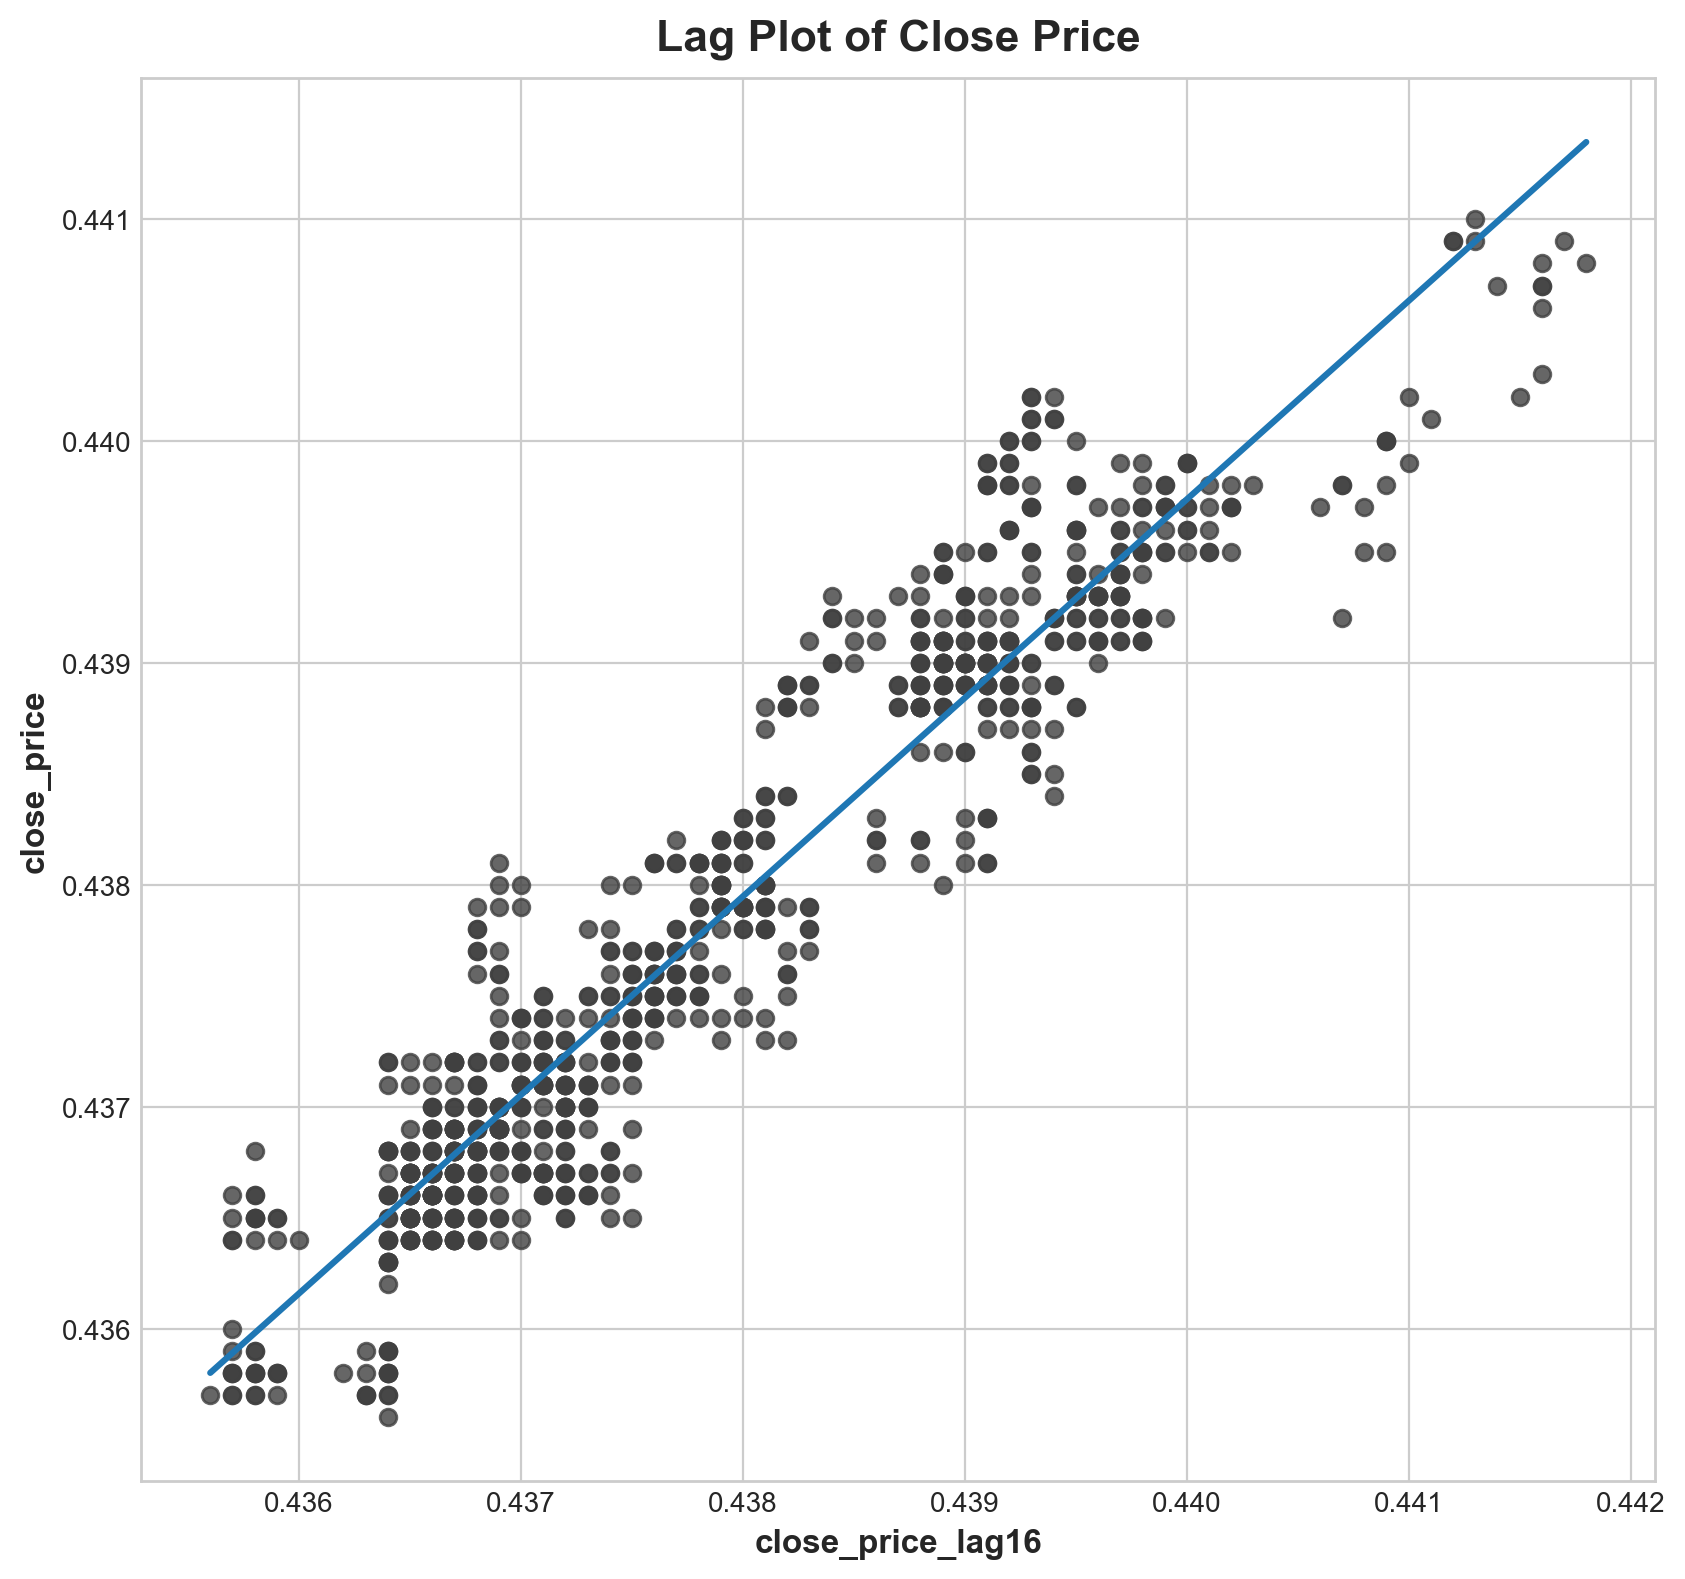

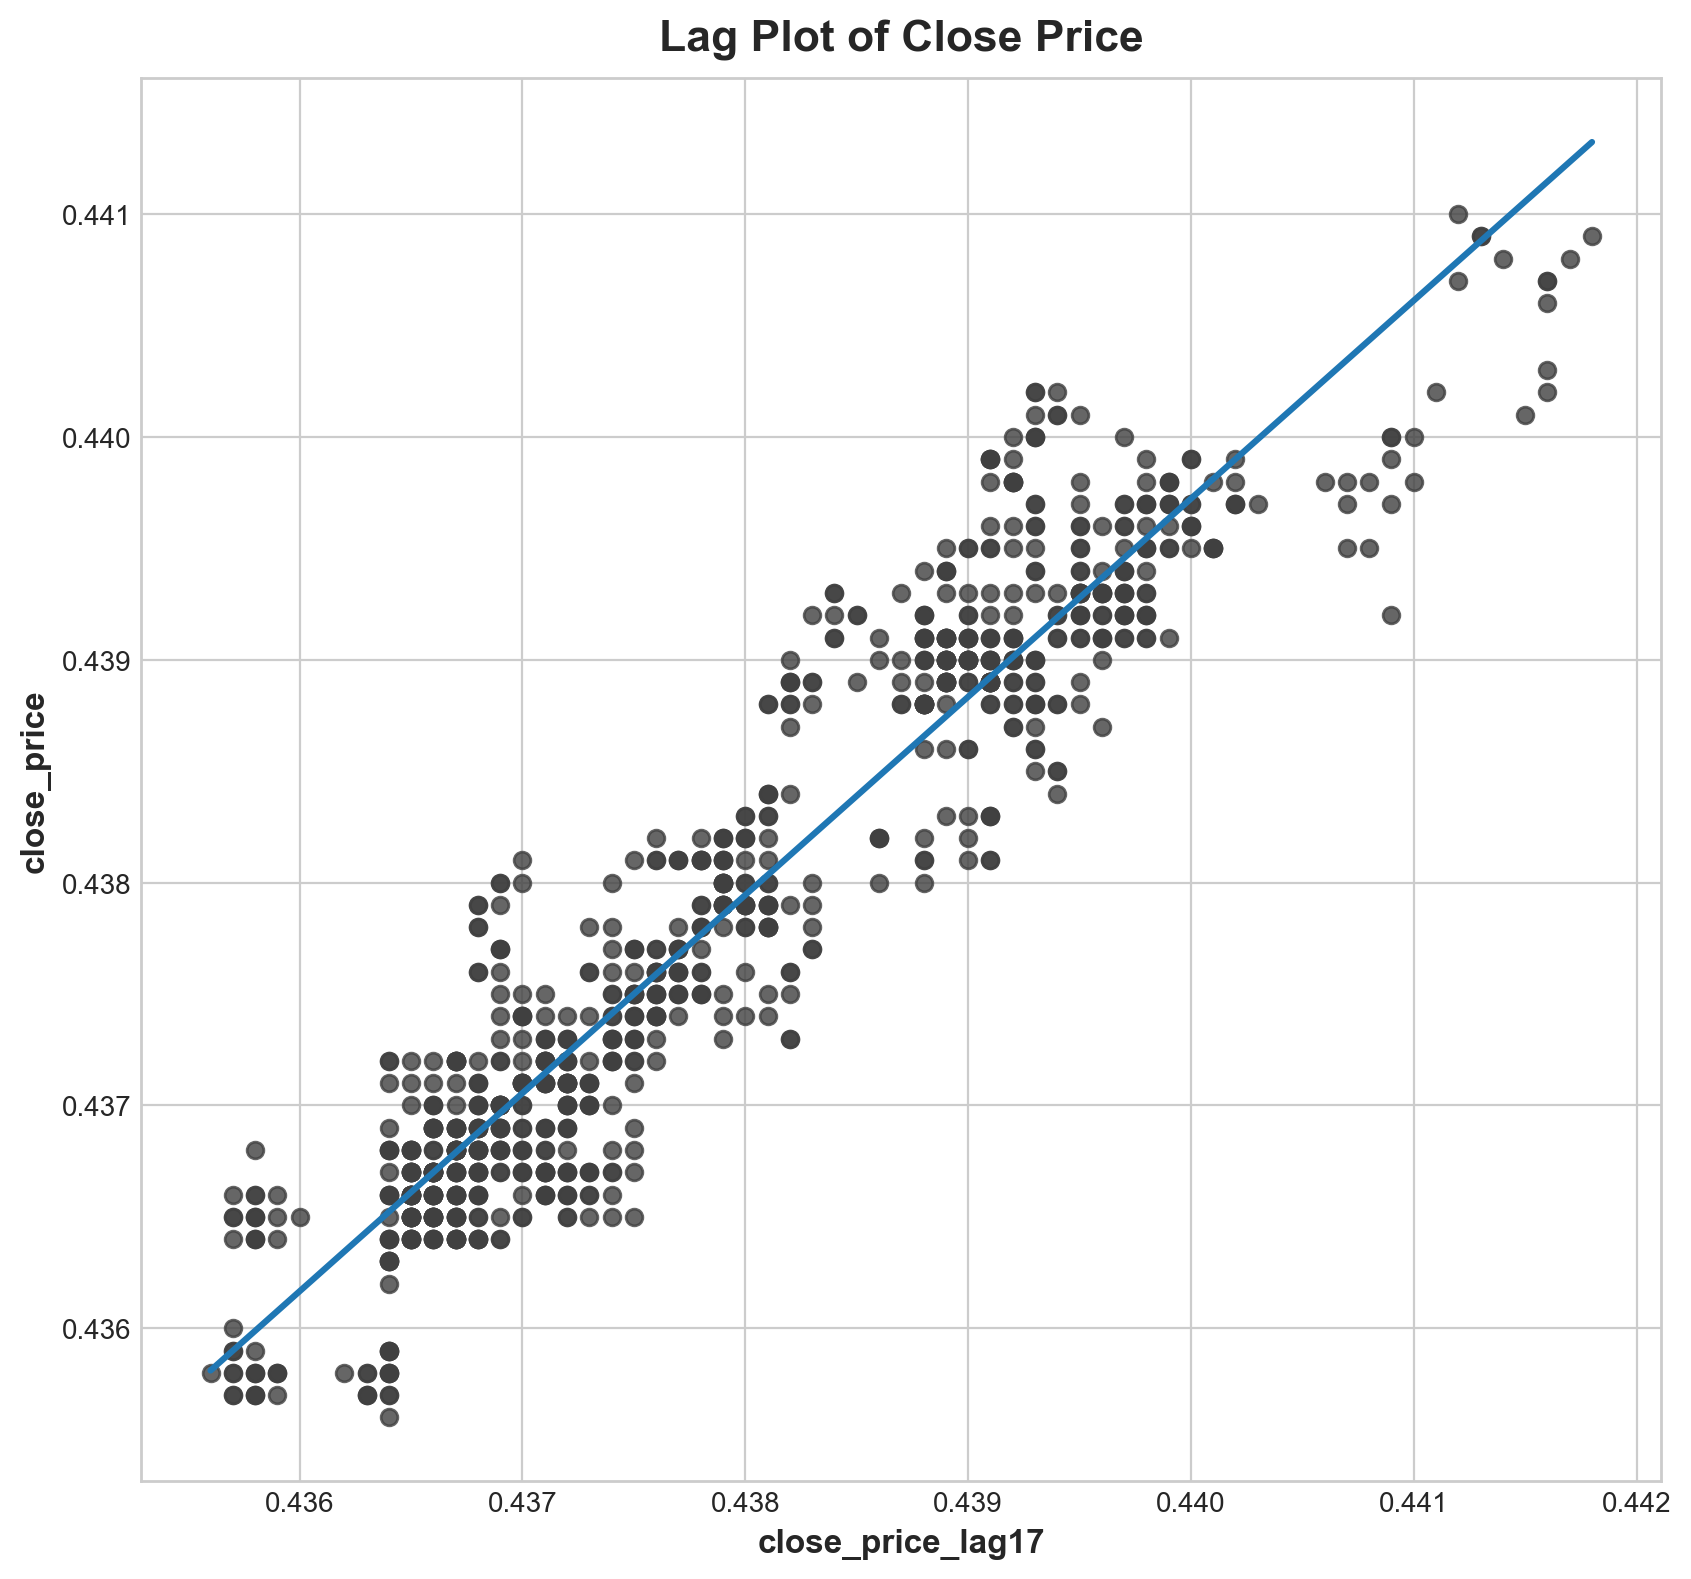

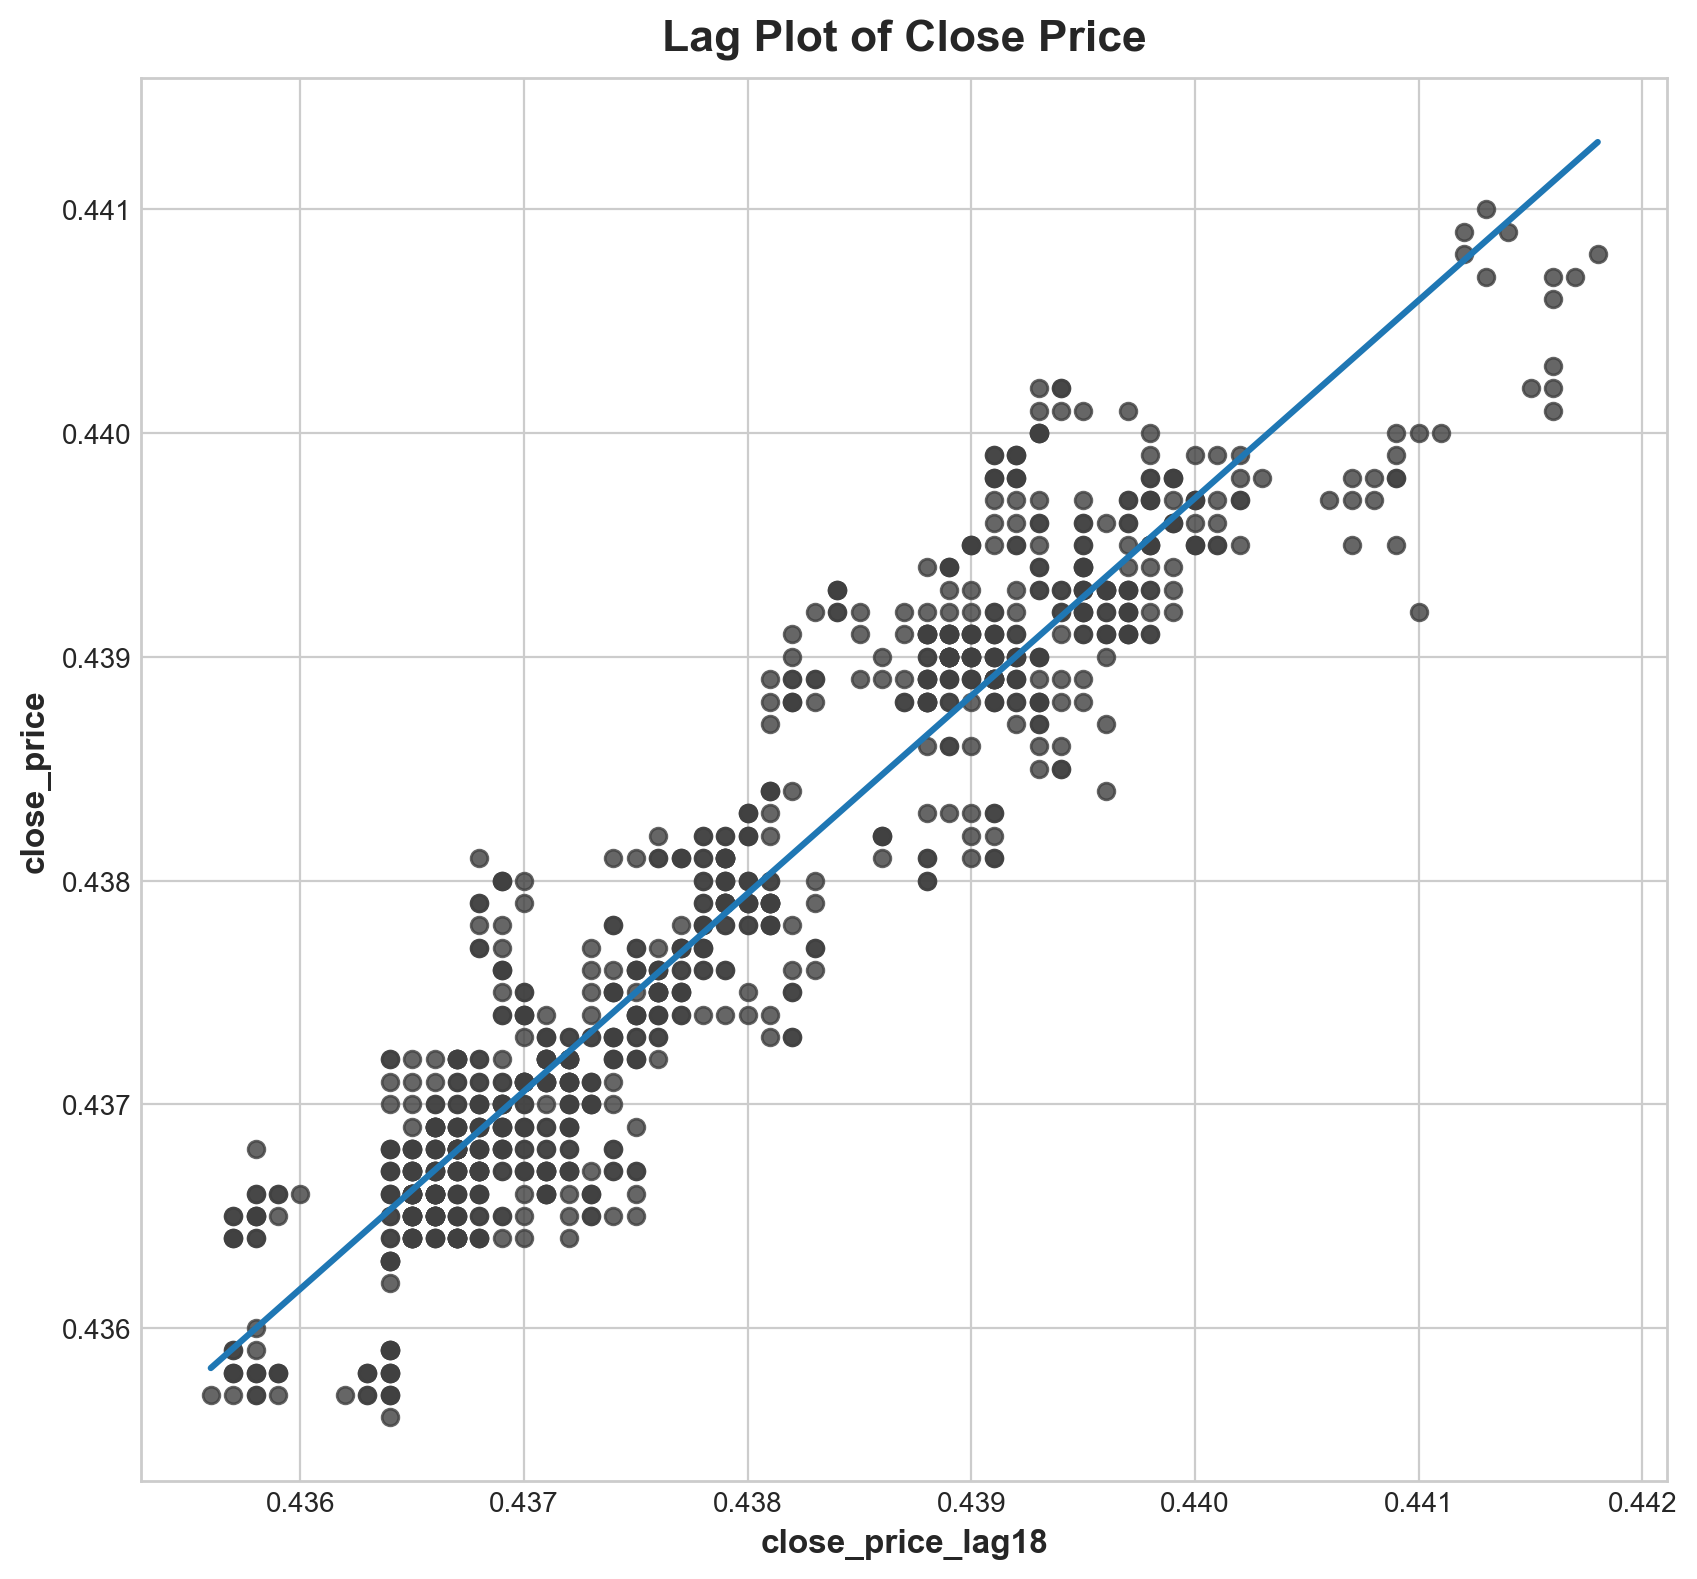

In [244]:
ls = [
    'close_price_lag1',
    'close_price_lag2',
    'close_price_lag3',
    'close_price_lag4',
    'close_price_lag5',
    'close_price_lag6',
    'close_price_lag7',
    'close_price_lag8',
    'close_price_lag9',
    'close_price_lag10',
    'close_price_lag11',
    'close_price_lag12',
    'close_price_lag13',
    'close_price_lag14',
    'close_price_lag15',
    'close_price_lag16',
    'close_price_lag17',
    'close_price_lag18'

]
for i in ls:
    fig, ax = plt.subplots()
    ax = sns.regplot(x=i, y='close_price', data=df, ci=None, scatter_kws=dict(color='0.25'))
    ax.set_aspect('equal')
    ax.set_title('Lag Plot of Close Price');

C:\Users\HP\AppData\Local\Temp\ipykernel_16472\3525081130.py:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



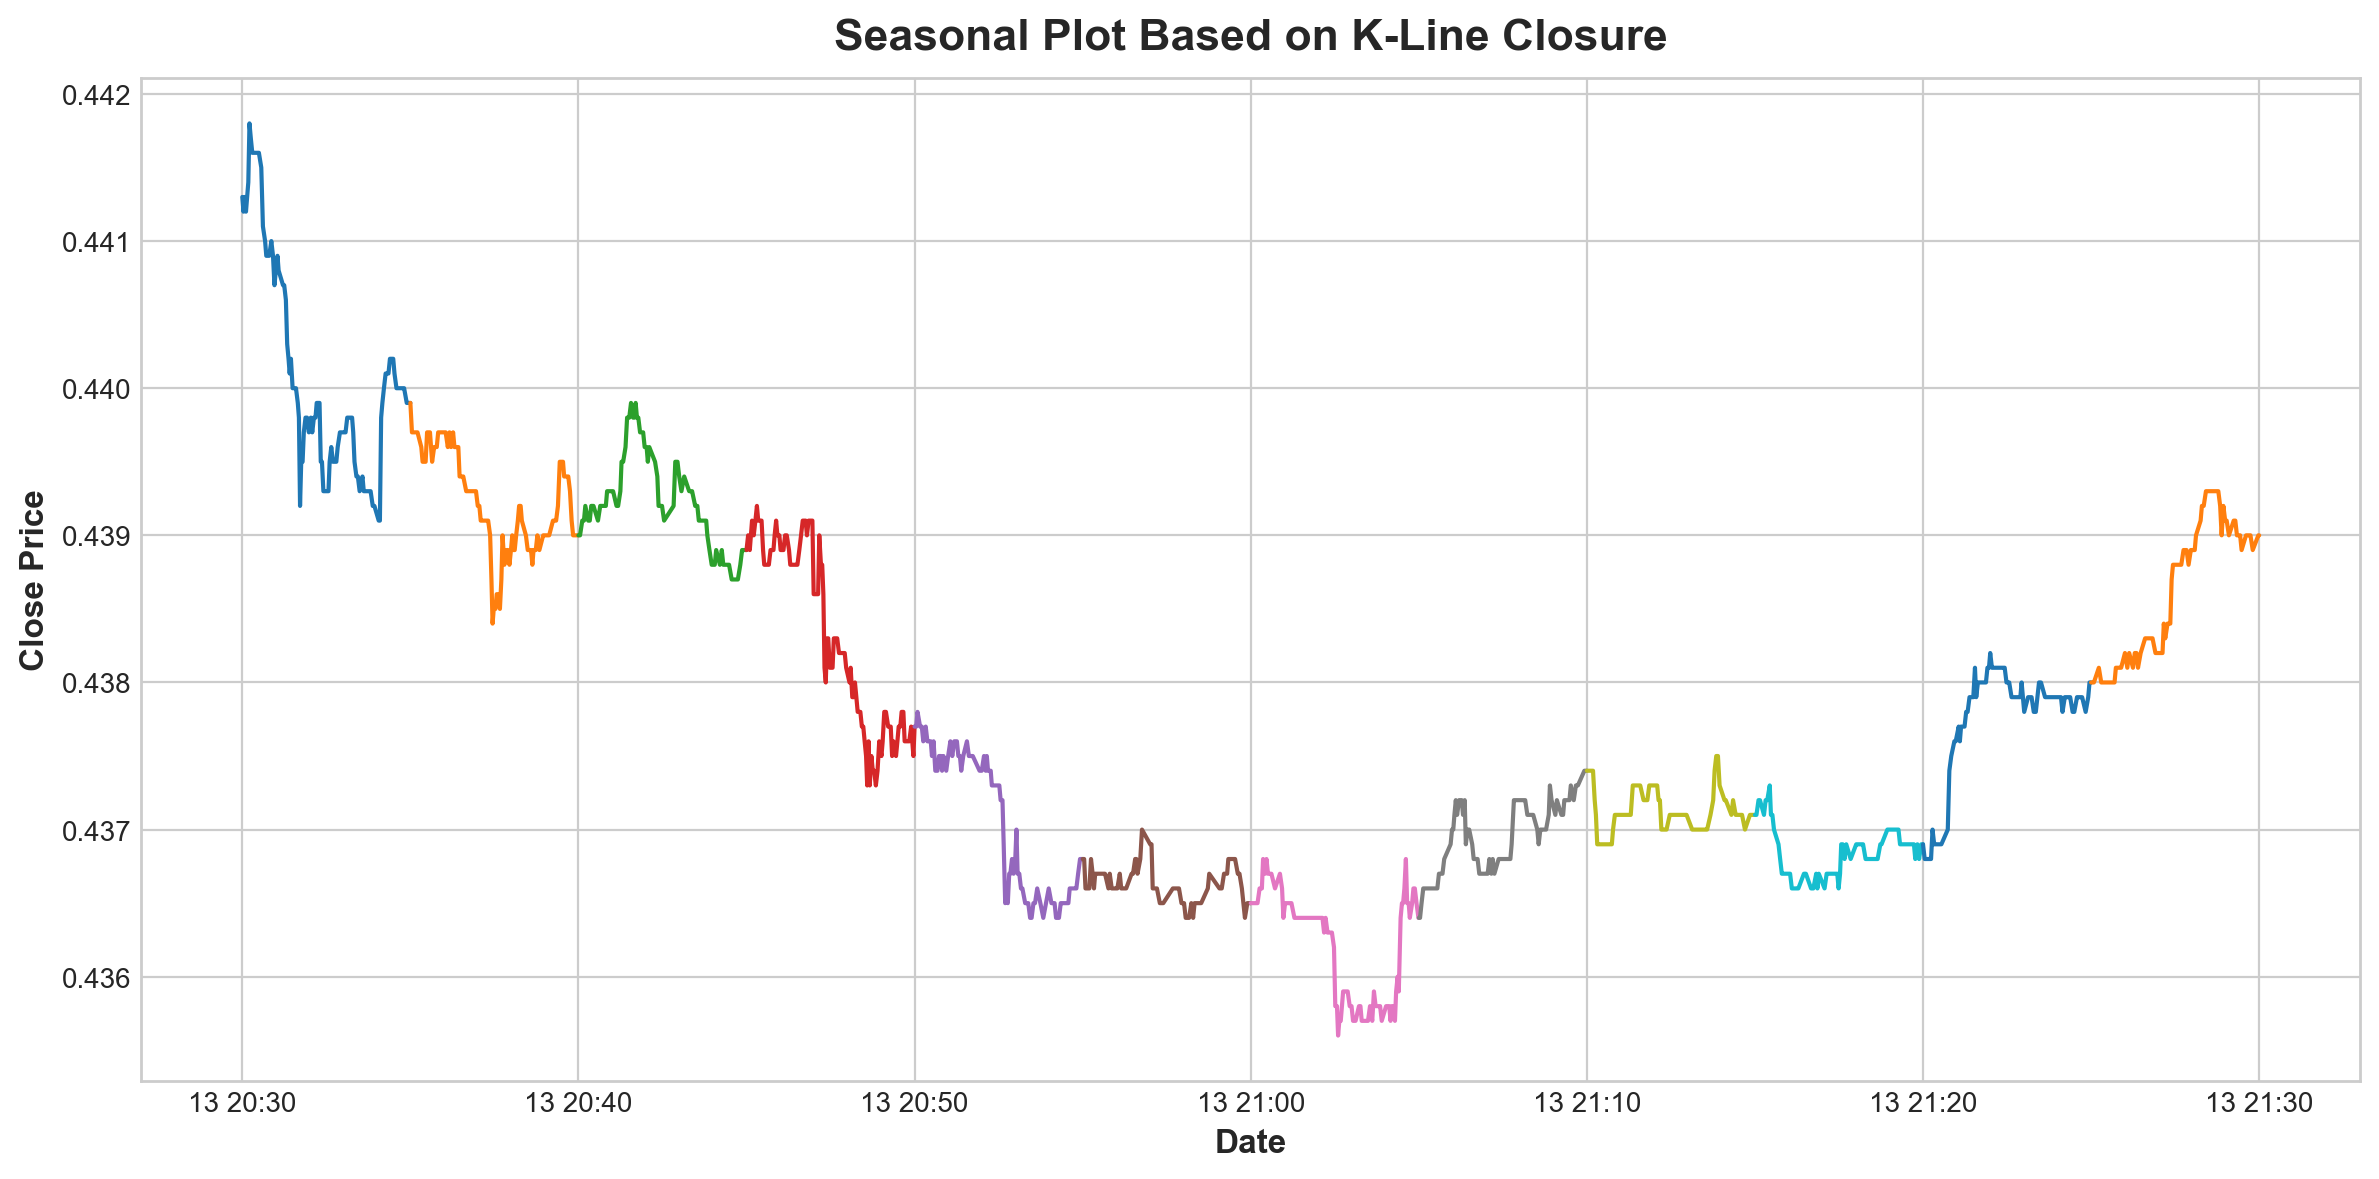

In [253]:
closed_periods = df[df['is_kline_closed']].index


closed_periods = closed_periods.append(pd.DatetimeIndex([df.index[-1]]))

plt.figure(figsize=(12, 6))

for start, end in zip(closed_periods[:-1], closed_periods[1:]):
    segment = df[start:end]
    plt.plot(segment.index, segment['close_price'])

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Seasonal Plot Based on K-Line Closure')
plt.legend(loc='best')
plt.grid(True)
plt.show()